In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
# using to data fit
from scipy.optimize import curve_fit

# =========================================================
# GLOBAL CONFIGURATION (rcParams)
# =========================================================

# 1. FONT AND TEXT SETTINGS
# ---
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'Lato', 'DejaVu Sans'],  # Priority list of clean fonts
    'font.size': 11,                                                   # Base font size for all elements

    # Specific settings for titles and axes
    'axes.titlesize': 15,                                              # Larger plot title size
    'axes.titleweight': 'bold',                                        # Bold title for emphasis
    'axes.labelsize': 13,                                              # Axis labels size (larger than base)
    'legend.fontsize': 11,                                             # Legend text size
})


# 2. AXES, TICKS, AND GRID SETTINGS
# ---
plt.rcParams.update({
    # GRID: Light and non-intrusive
    'axes.grid': True,              # Enable grid by default
    'grid.linestyle': '--',         # Dashed grid lines
    'grid.color': 'lightgray',      # Light color for grid
    'grid.alpha': 0.7,              # Transparency for grid

    # AXES SPINES (The box outline)
    'axes.spines.right': True,      # Draw right spine
    'axes.spines.top': True,        # Draw top spine
    'axes.edgecolor': 'black',      # Black color for the box outline
    'axes.linewidth': 1.2,          # Thickness of the box outline

    # MAJOR TICKS (The main markings with numbers)
    'xtick.direction': 'in',        # Major ticks pointing inwards
    'ytick.direction': 'in',
    'xtick.major.size': 6,          # Major tick length
    'ytick.major.size': 6,
    'xtick.top': True,              # Draw major ticks on the top side
    'ytick.right': True,            # Draw major ticks on the right side
    'xtick.labeltop': True,         # Show numbers on the upper X axis
    'ytick.labelright': True,       # Show numbers on the right Y axis
    
    # MINOR TICKS (Small markings between major ticks)
    'xtick.minor.visible': True,    # Enable minor ticks
    'ytick.minor.visible': True,
    'xtick.minor.top': True,        # Draw minor ticks on the top side
    'ytick.minor.right': True,
    'xtick.minor.size': 4,          # Minor tick length
    'xtick.minor.width': 0.8,       # Minor tick thickness
    'ytick.minor.width': 0.8,
})


# 3. LINES AND MARKERS SETTINGS
# ---
plt.rcParams.update({
    'lines.linewidth': 2.0,         # Default thickness for primary plot lines
    'lines.markersize': 4,          # Default size for data markers
    'lines.markeredgewidth': 1.0,   # Controls marker border thickness AND errorbar caps
})


# 4. ERRORBAR SETTINGS
# ---
plt.rcParams.update({
    'errorbar.capsize': 0.0,        # Length of the horizontal "caps" at the ends
})


# 5. LEGEND AND SAVING SETTINGS
# ---
plt.rcParams.update({
    # High-quality export settings (Best for a thesis)
    'figure.dpi': 300,              # Default display resolution (high quality)
    'savefig.format': 'pdf',        # Default save format to PDF (Vector format)
    'savefig.bbox': 'tight',        # Automatically trim excess white space
    'savefig.pad_inches': 0.05,     # Small padding to prevent clipping
    'pdf.fonttype': 42,             # Embeds fonts correctly in PDF for editing

    # Legend Appearance
    'legend.frameon': True,         # Draw a box around the legend
    'legend.edgecolor': 'lightgray',# Light border for the legend box
    'legend.fancybox': True,        # Slightly rounded legend border
})

# <span style="color:orange">Numerical Simulation Laboratory (NSL)</span>
## <span style="color:green">Numerical exercises 1</span>

This laboratory is mainly focused on Monte Carlo methods and simulations. Consequently, a significant portion of our work will rely on the pseudo-random number generators created by the NYU team and downloaded from [NSL Ariel website](https://myariel.unimi.it/mod/folder/view.php?id=96162).


The notebook is organized into three main sections:
1. [Pseudo Random generator goodness evaluation](#pseudo-random-generator-goodness-evaluation)

2. [Implementation of PDF sampling algorithms and generalized Central Limit Theorem verification](#implementation-of-pdf-sampling-algorithms-and-generalized-central-limit-theorem-verification)

3. [Buffon’s experiment](#buffons-experiment)

<h4>Blocking method</h4>

Since **pseudo-random** numbers (i.e. generated by a deterministic algorithm) are correlated, our esteem of the statistical uncertainty is affected by this correlation and we can not rely on the CLT to compute it. In this situation is useful to employ the **blocking method**. It consist in dividing a Monte Carlo simulation of $M$ *steps* in $N$ *blocks*, each of one has a *size* $L=M/N$. Doing so we can assume that the correlation between the values vanishes (as long as the size is sufficiently big), allowing us to treat data as uncorrelated and normally distributed.

For each block we compute the *block average*:

$$A_{i} = \frac{1}{L} \sum_{j = 1}^{L}x_j$$

As the simulation goes on, we can compute *progressive mean value* $\langle A\rangle$ (at the end of the simulation this value is equal to the mean of $M$ *measures*) and the *progressive mean squared value* $\langle A^2 \rangle$ over blocks at a given "*time*" $n$:
$$ \langle A^2 \rangle_{n} \simeq \frac{1}{n} \sum_{i=1}^n A^2_i \quad \quad \langle A\rangle^2_{n} \simeq \left( \frac{1}{n} \sum_{i=1}^n A_i \right)^2 $$
and also the *progressive uncertainty* as the standard deviation of the progressive mean over blocks:
$$\sigma_{n} = \sqrt{\frac{\langle A^2 \rangle_{n} - \langle A\rangle^2_{n}}{n-1}}$$

<a id="pseudo-random-generator-goodness-evaluation"></a>
<h2><span style = "color:darkviolet">Pseudo Random generator goodness evaluation</span></h2>

Here we want to test the goodness of the pseudo-random generator. To achieve this, we compute are going to :
1. [compute the **mean value** of the uniform distribution and compare it to the expected value](#mean-value-and-variance);
2. [compute the **variance** of the uniform distribution and compare it to the expected value](#mean-value-and-variance);
3. [test the quality of the random number generator through the **Pearson $\chi^2$ statistic**](#chi2-statistic), which measures the discrepancy between the observed frequencies of events and the expected ones under a given hypothesis (*null hypotesis*).

<a id="mean-value-and-variance"></a>
<h3><span style = "color:darkviolet">Mean value and variance</span></h3>

Given an **uniform distribution function** 

$$p(x) = 
\begin{cases}
    1 & \text{if } x \in [0;1] \\
    0 & \text{if } x \in \mathbb{R} \setminus [0;1]
\end{cases}$$

the *mean value* and the *second central momentum* of the distribution are analitically obtained as : 

$$\langle x \rangle = \int_{-\infty}^{+\infty}dx~x~p(x) = \int_{0}^{1}dx~x = 0.5$$

$$\sigma^2 = \int_{-\infty}^{+\infty}dx~(x - \langle x \rangle)^2~p(x) = \int_{0}^{1}dx~x^2 - \langle x \rangle ^2 = \langle x^2 \rangle - \langle x \rangle ^2 = 1/12 $$
 
We can numerically esteem this integral using the pseudo-random generator.


<h4>Implementation</h4>

My code is based on a two functions:

````cpp
void Simulation(Random rnd, int M, int N, double b, int n, string ofilename)
`````

whose routine reproduces the *blocking method*. It has as input values :
- a random generator `rnd`;
- throws number `M`;
- blocks number `N`;
- a variable `b` linked to the true value of the n-th momentum of the stocastic variable;
- a variable `n` which defines the central momentum order of the stocastic variable (e.g. to compute the mean value $b = 0$ and $n = 1$);
- output file `ofilename` in which all the data produced are printed using an output stream

and calls another function 

````cpp
double error(double a, double a2, int n)
`````

which takes as inputs:
- the total number of blocks computed `n`;
- the progressive mean after `n` blocks computed `a`;
- the progressive squared mean after `n` blocks computed `a2`.

and computes the progressive standard deviation.

The algorithm is implemented using two nested ***for loop*** . The inner, with range $[0, L)$, creates L pseudo-random numbers and accumulate them in a variable `acc`. Once the inner *for loop* ends, I compute mean and squared mean for the current block. Both values are put accumulated into two variables `mean` and `mean2` and then I set to zero the variable `acc`. In this way I can compute mean value and standard deviation on the fly as the simulation goes on and print their value on an output file.
Once the outer *for loop* ends, the two variables `mean` and `error` hold final mean and standard deviation of the dataset.

Exercise 1.1 is done using as input `b = 0` and `n = 1`.

Exercise 1.2 is done using as input `b = 0.5` and `n = 2`

I have decided to run two different simulations in both exercises, one with $M = 10^5$ throws and one with $M = 10^7$ throws to see how the evaluation of mean and standard deviation changes as the quantity of pseudo-random numbers increases.

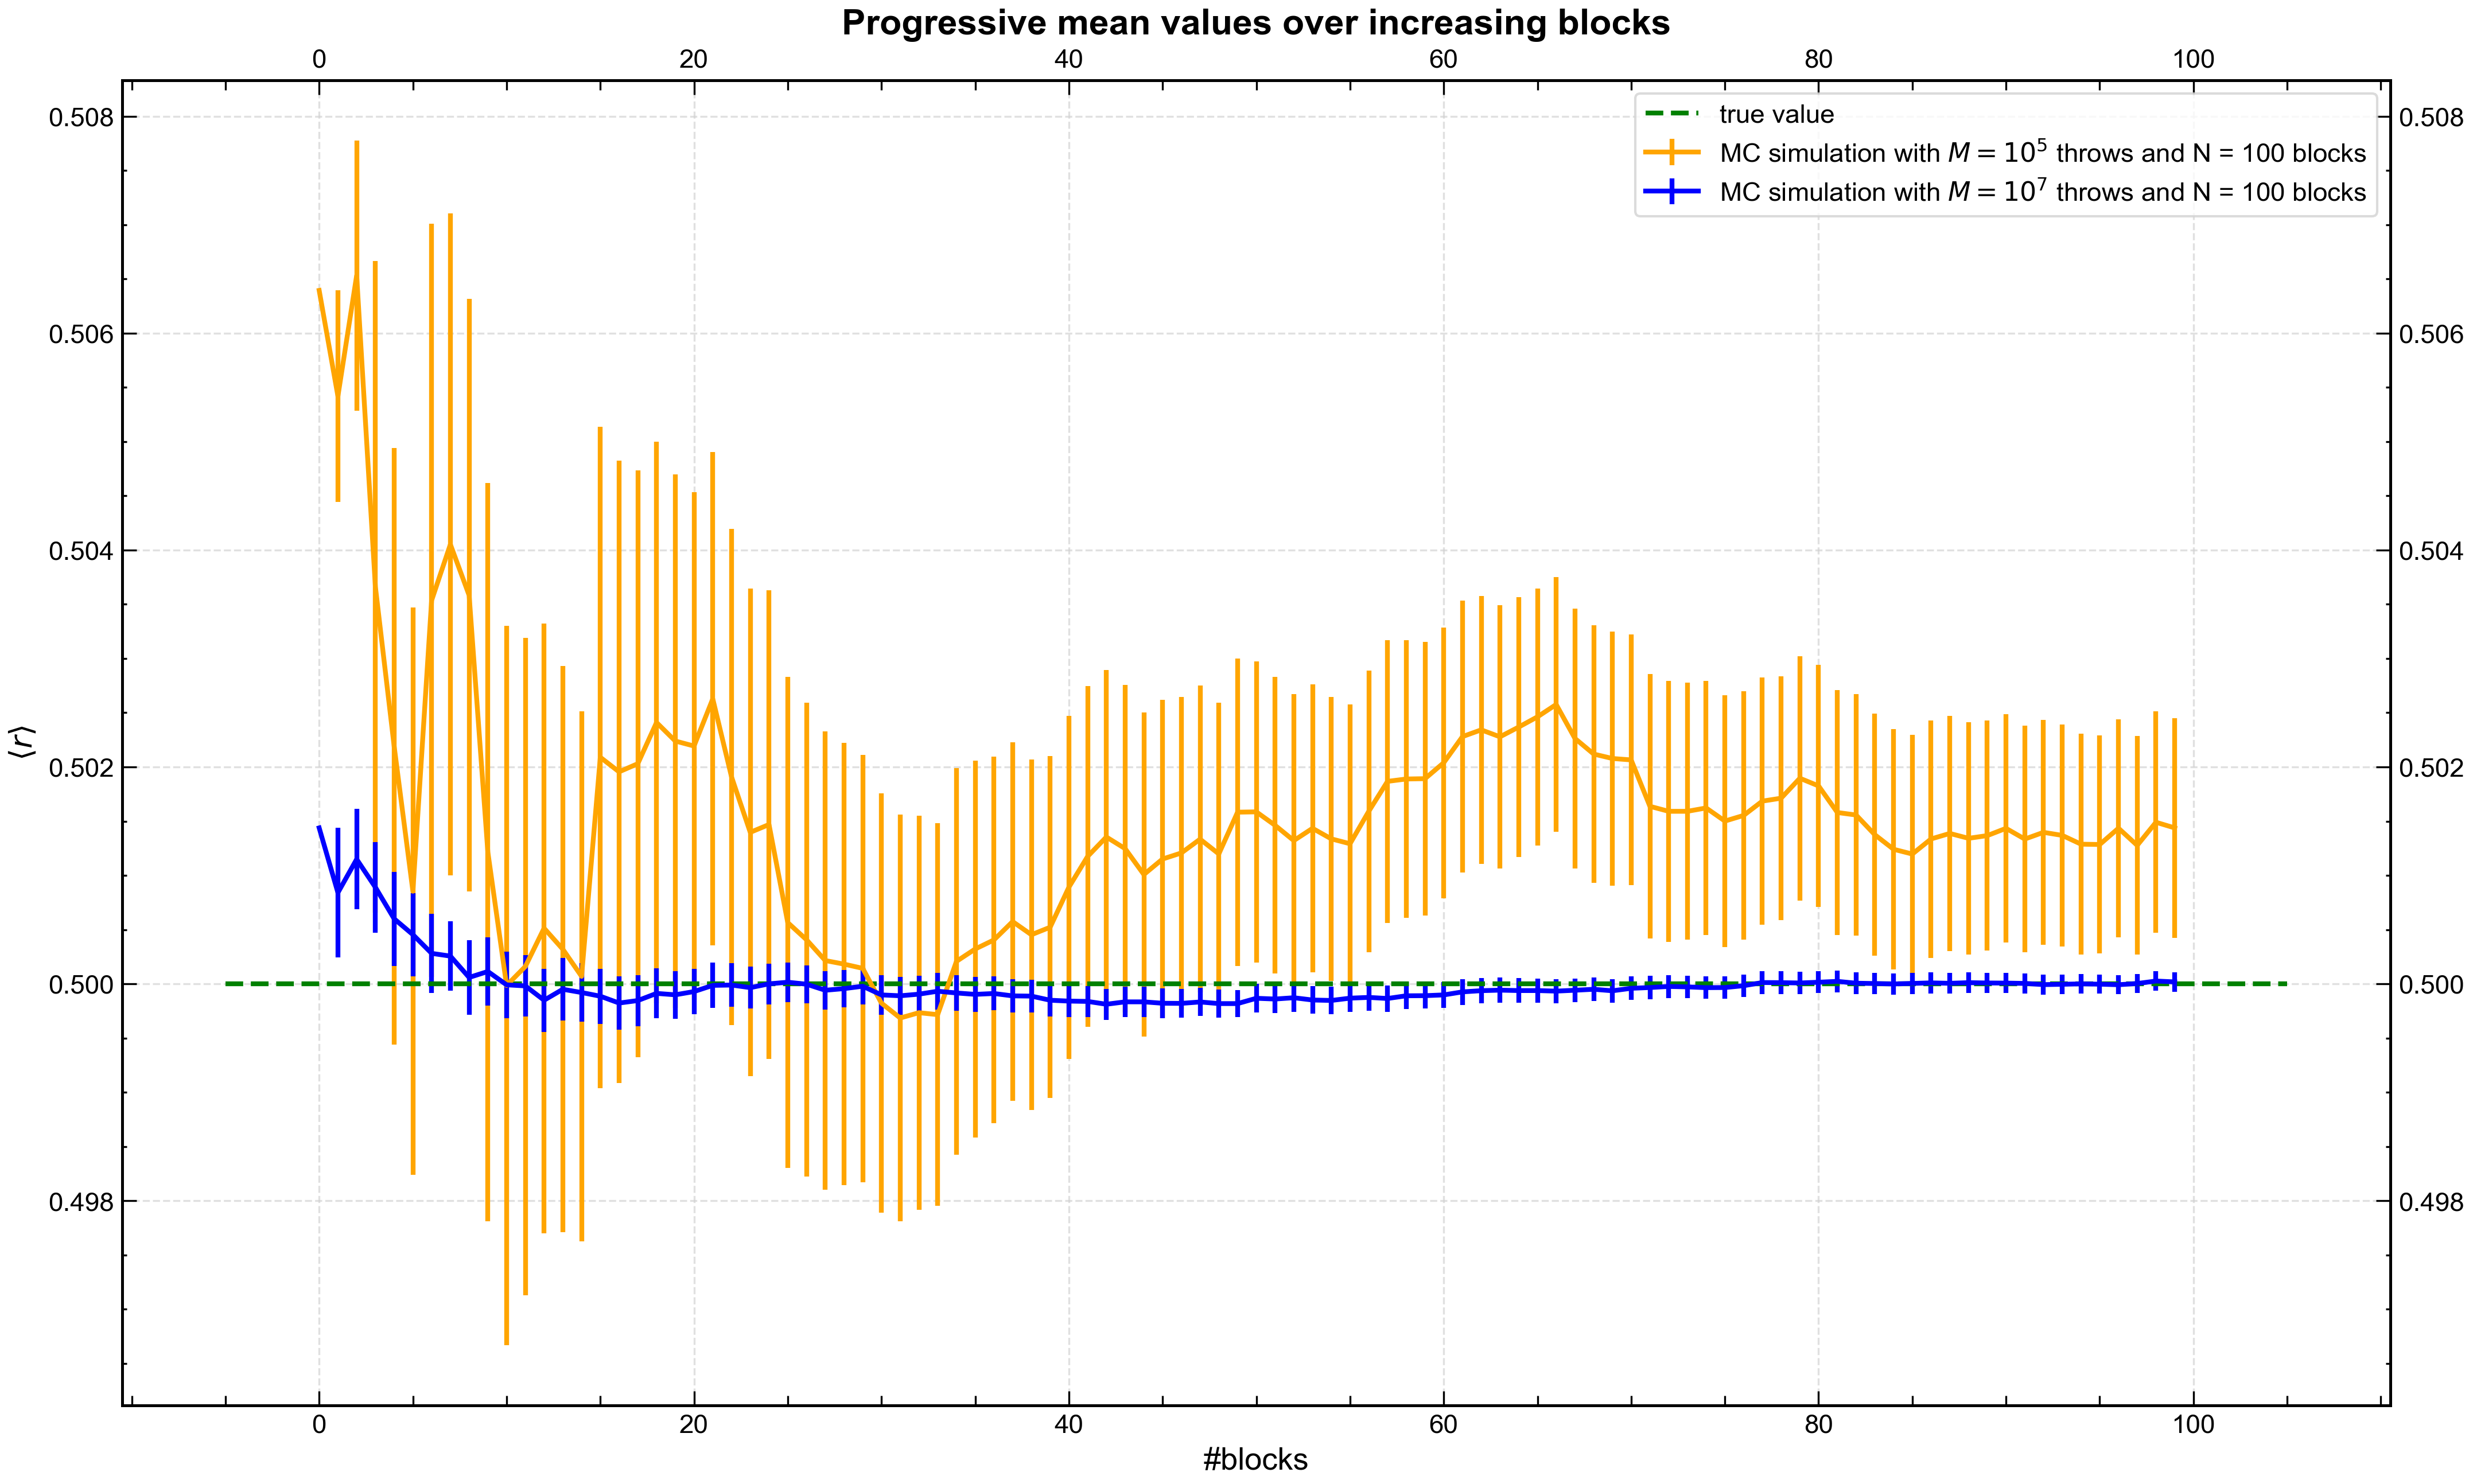

SIMULATION with M = 100000 and N = 100
best estimate of the integral :  0.501 ± 0.001
distance from true value in sigma unit :  1.42 sigma

SIMULATION with M = 10000000 and N = 100
best estimate of the integral :  0.50002 ± 0.00009
distance from true value in sigma unit :  0.2 sigma


In [13]:
n_blocks=100

# create 3 arrays loading data from file which has 4 cols 
x, mean, error = np.loadtxt("es_1.1/OUTPUT/mean_error1.1.data", usecols=(0,2,3), unpack = 'true')
mean2, error2 = np.loadtxt("es_1.1/OUTPUT/mean_error1.2.data", usecols=(2,3), unpack = 'true')

# plotting progressive mean values for simulation with 10^5 and 10^7 total throws
fig = plt.figure(figsize = (17,10) )
plt.title("Progressive mean values over increasing blocks")
plt.errorbar(x, mean, yerr = error, color = "orange", label = "MC simulation with $M = 10^5$ throws and N = 100 blocks")
plt.errorbar(x, mean2, yerr = error2, color = "blue", label = "MC simulation with $M = 10^7$ throws and N = 100 blocks")
plt.hlines(0.5, -5, n_blocks + 5, linestyle = "--", color = "green", label = "true value")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel(r'$\langle r \rangle$')
# plt.grid(True)
plt.savefig("es_1.1/plots/prog_mean_vs_blocks.png")

plt.show()

# mean[-1] is last data of list mean
# printing output values
print("SIMULATION with M = 100000 and N = 100\nbest estimate of the integral : ", round(mean[-1],3), "±", round(error[-1],3)  )
print("distance from true value in sigma unit : ",round(abs(mean[-1] - 0.5)/error[-1],2),"sigma")
print("\nSIMULATION with M = 10000000 and N = 100\nbest estimate of the integral : ", round(mean2[-1],5), "±", "{:.5f}".format(round(error2[-1],5))  )
print("distance from true value in sigma unit : ",round(abs(mean2[-1] - 0.5)/error2[-1],2),"sigma")


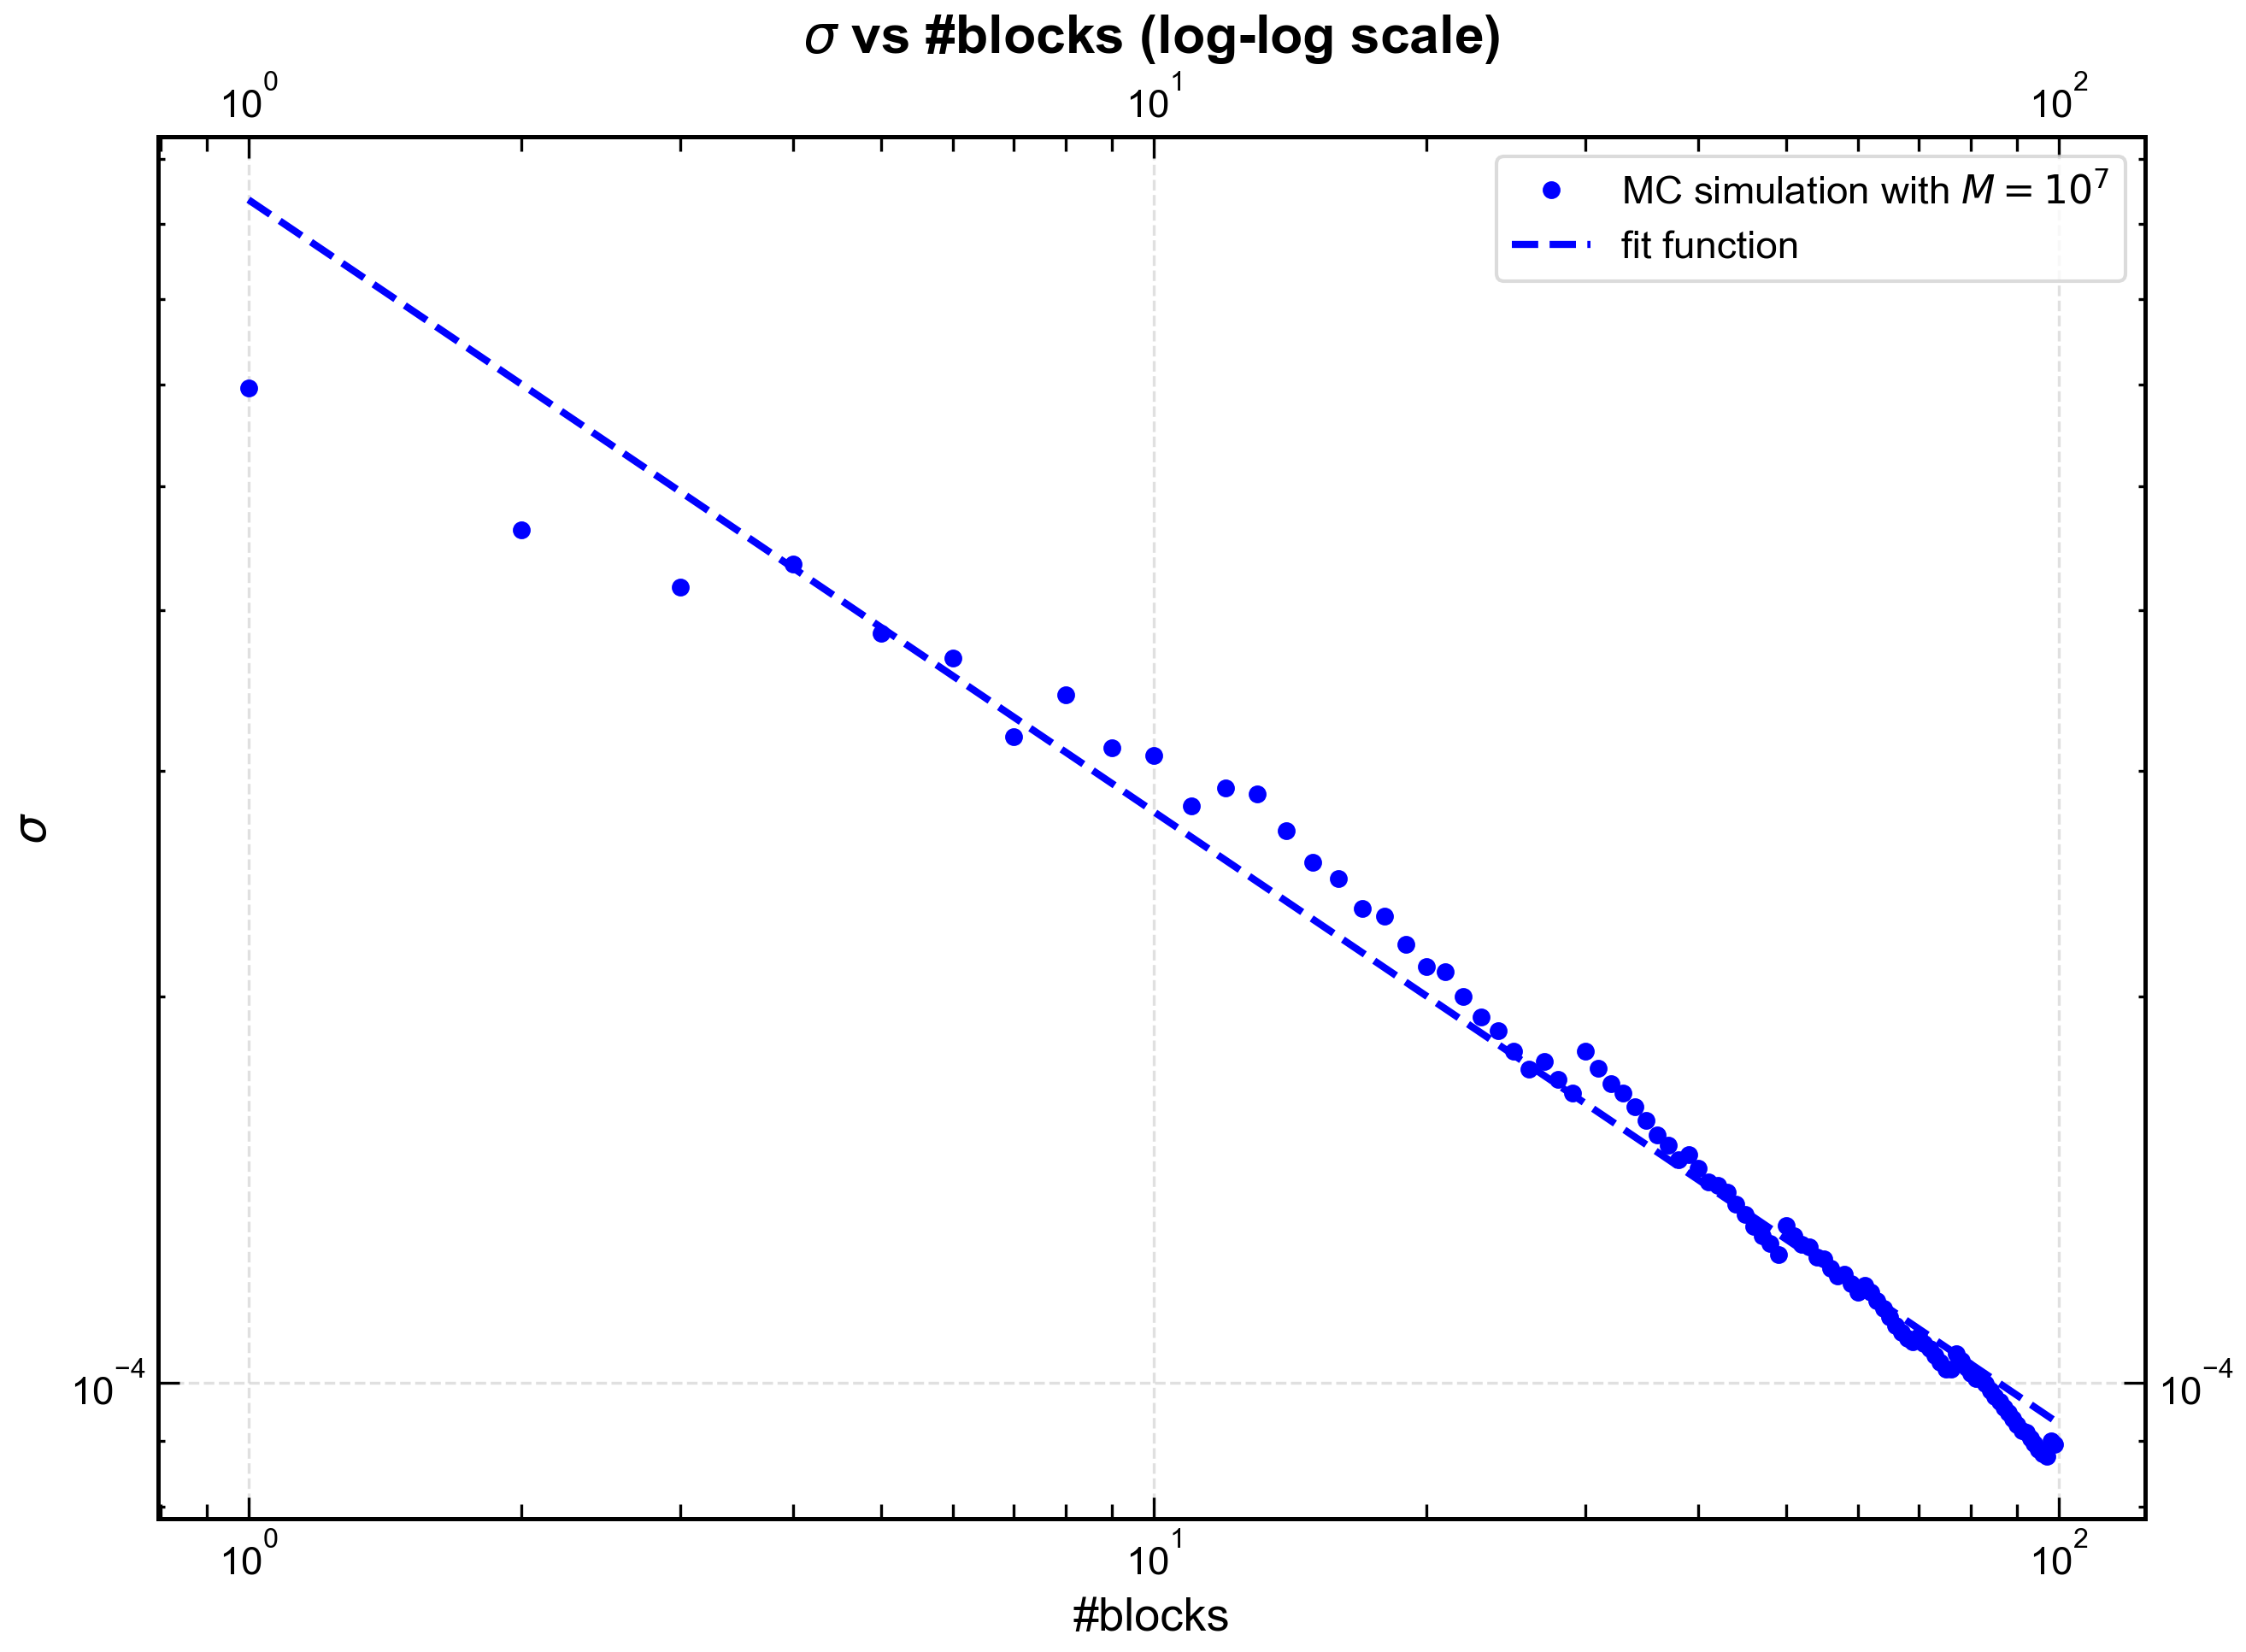

Fit function power law value : -0.48 ± 0.01


In [14]:
# plotting progressive standard deviation values for simulation with 10^7 throws

# removing first data of each list since it's zero to avoid log(0) when fitting
x = np.delete(x, 0)
error2 = np.delete(error2, 0)

# producing log arrays to fit the dataset
x_log = np.log(x)
error2_log = np.log(error2)

# power law fit function
def fit_function(x, A, B):
    return A + B*x

# performing fit
popt, pcov = curve_fit(fit_function, x_log, error2_log)

# creating list of fit data to plot the fit function
x_fit = np.linspace(min(x_log), max(x_log), 100)
y_fit = fit_function(x_fit, popt[0], popt[1])

# returning to data in linear scale
x_fit = np.exp(x_fit)
y_fit = np.exp(y_fit)

# plotting figure
fig = plt.figure(figsize = (10,7))
plt.title(r'$\sigma$ vs #blocks (log-log scale)')
plt.plot(x, error2, "bo", label = "MC simulation with $M = 10^7$")
plt.plot(x_fit, y_fit, "--", color = "blue", label = "fit function")
plt.xlabel("#blocks")
plt.xscale('log')
plt.ylabel(r"$\sigma$")
plt.yscale('log')
plt.legend()
# plt.grid(True)

plt.savefig("es_1.1/plots/std_dev_vs_blocks.png")

plt.show()

# printing output values
print("Fit function power law value :", round(popt[1],2) , "±", np.sqrt(round(pcov[1][1], 4)))

<h4>Conclusions</h4>

- Looking up to the graph above we can see that the mean value at the end of both the simulations ($M = 10^5$ orange one and $M = 10^7$ blue one & $N = 100$) is within $2\sigma$ (precisely $1.42\sigma$ for $M = 10^5$ and $0.20\sigma$ for $M = 10^7$) from the true value and therefore statistically acceptable.

- Increasing $M$ up to $10^7$ we can see that the last mean value comes closer and closer to the true value. The statistical uncertainty also decreases as $M$ increases. This suggests a behaviour similar to the one that predicted by the CLT. It has been quantitatively evaluated this behavoiur employing a linear fit, returning the following power law :

   $$\sigma(N) \simeq N^{B}$$

  with $B = -0.48 \pm 0.01$. The result is compatible with the trend predicted by the theory.

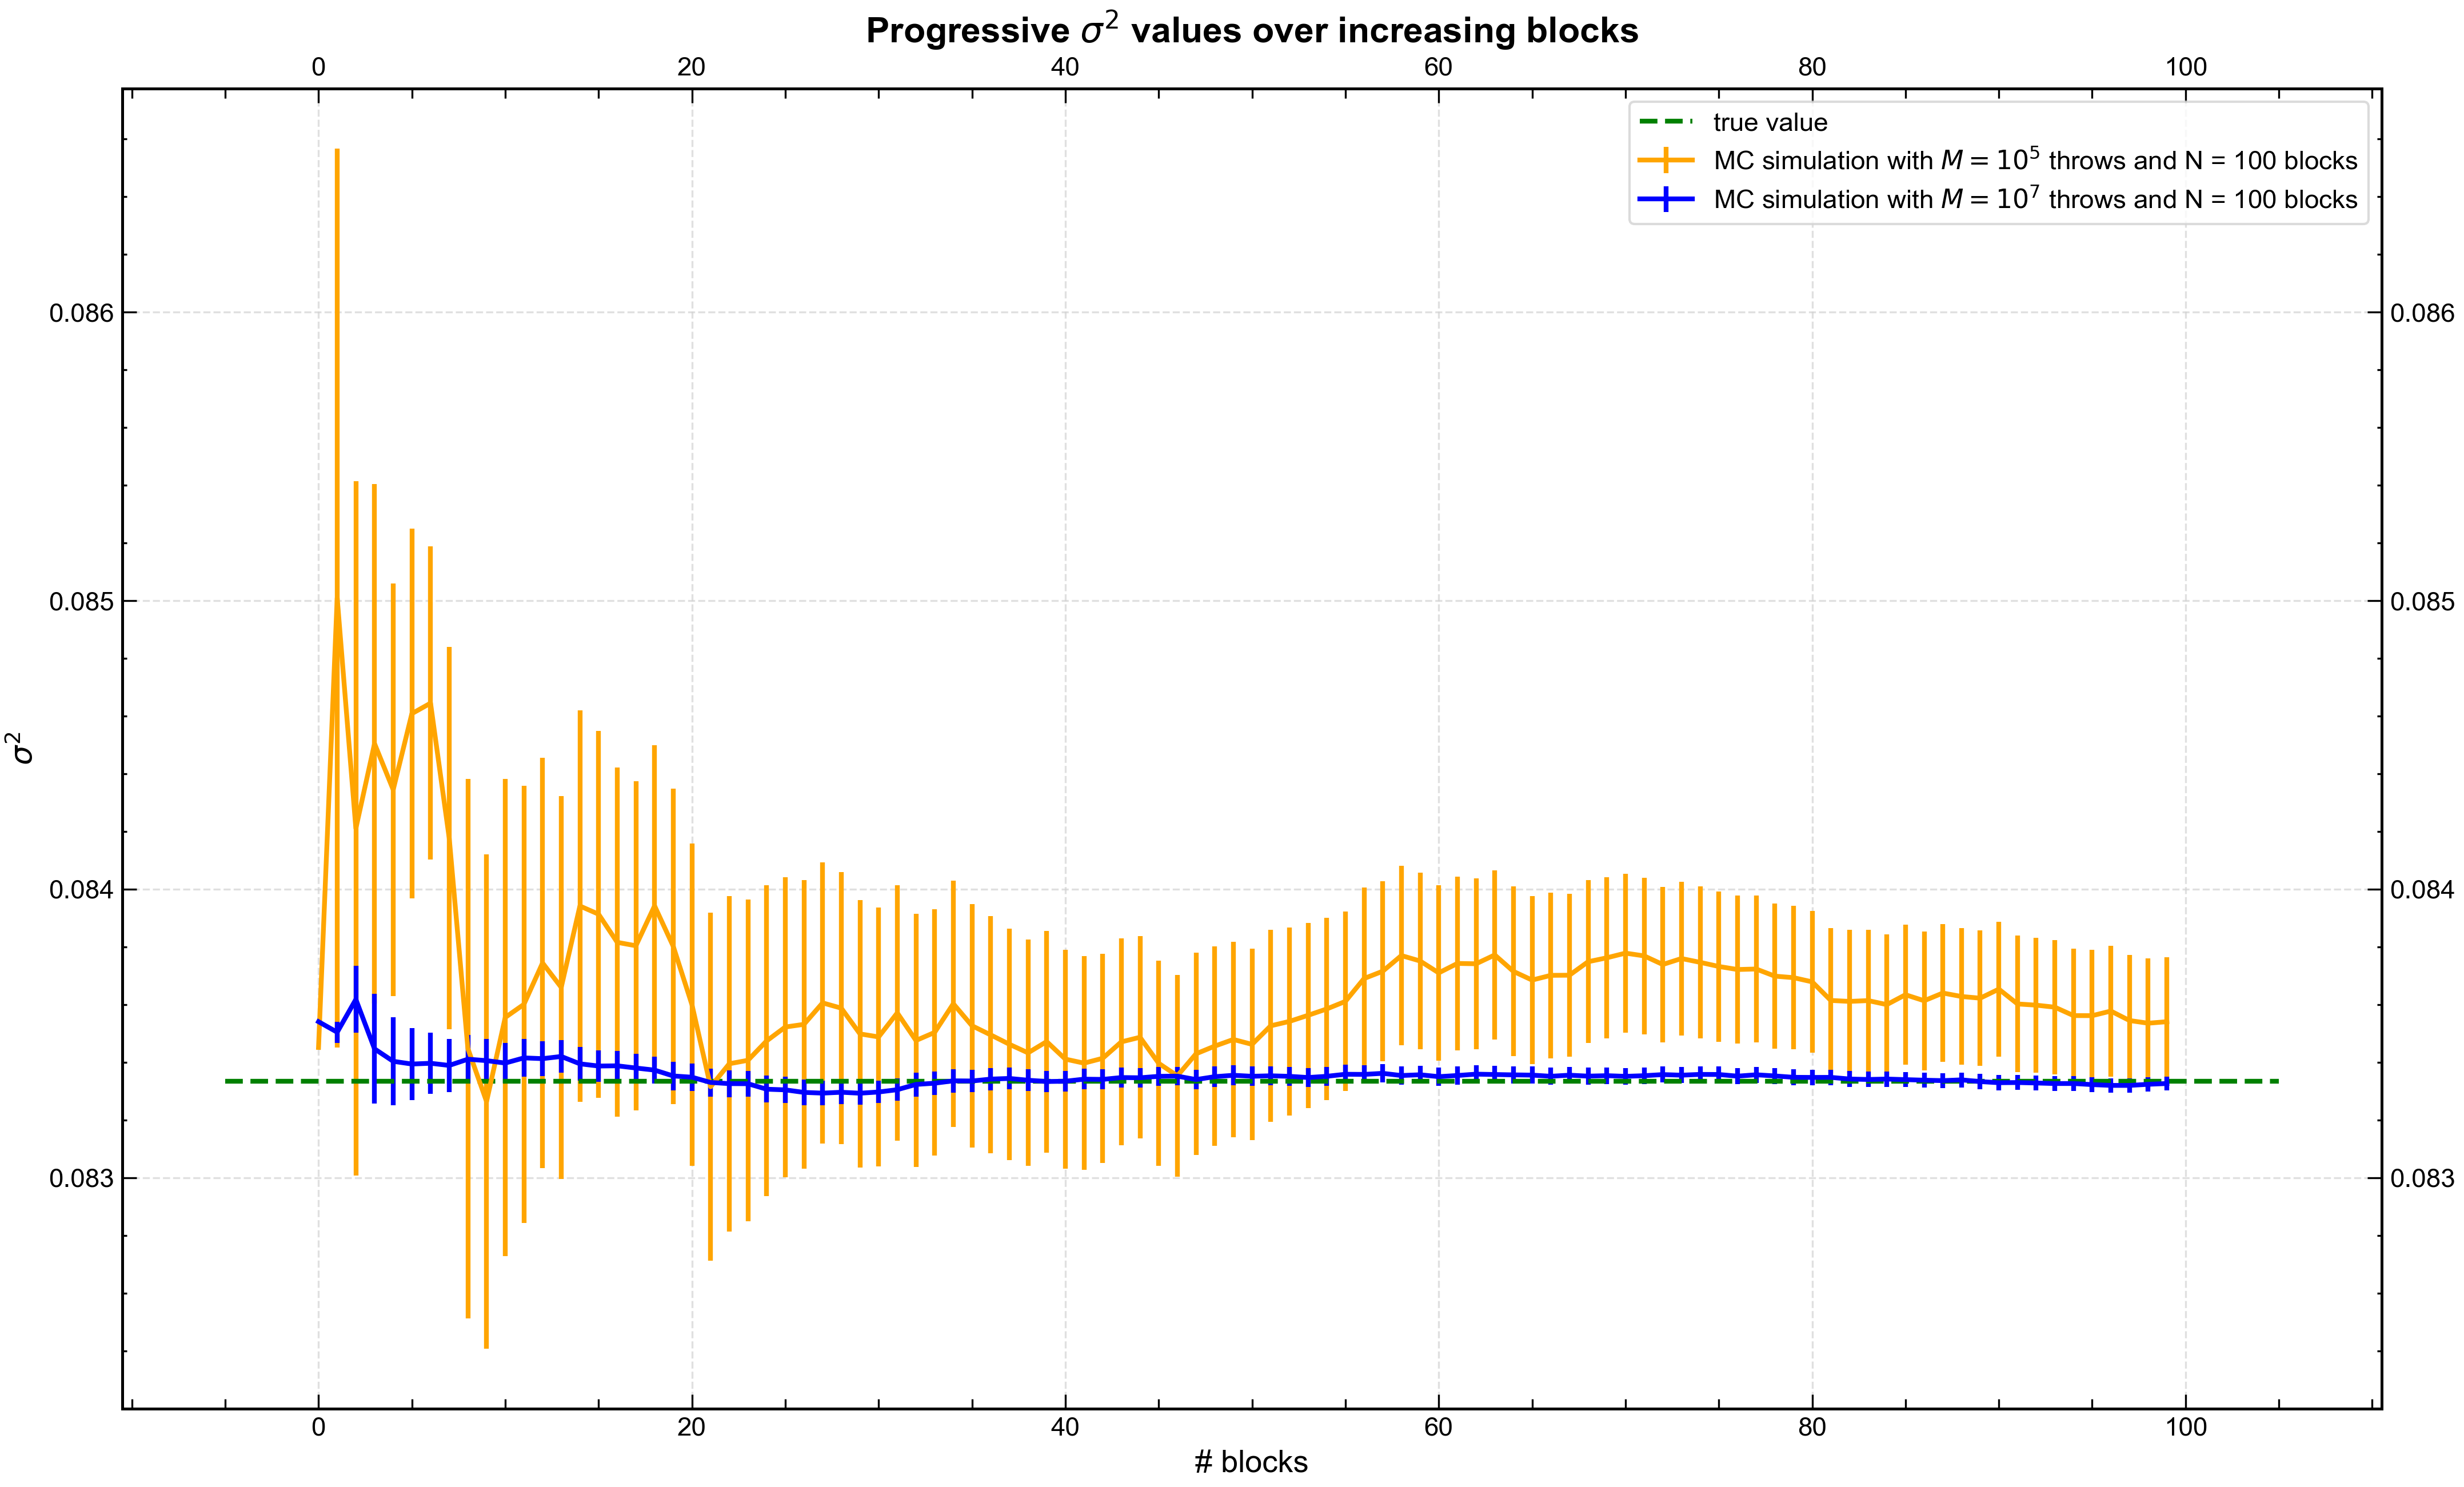

SIMULATION with M = 10000 & N = 100
best estimate of integral :  0.0835 ± 0.0002
distance from true value in sigma unit :  0.93 sigma

SIMULATION with M = 1000000 & N = 100
best estimate of integral :  0.083326 ± 0.000025
distance from true value in sigma unit :  0.28 sigma


In [15]:
x = np.arange(n_blocks)

mean, error = np.loadtxt("es_1.1/OUTPUT/mean_error2.1.data", usecols = (2,3), unpack = "true")
mean2, error2 = np.loadtxt("es_1.1/OUTPUT/mean_error2.2.data", usecols = (2,3), unpack = "true")

fig = plt.figure(figsize = (17, 10))
plt.title(r"Progressive $\sigma^2$ values over increasing blocks")
plt.errorbar(x, mean, yerr = error, color = "orange", label = "MC simulation with $M = 10^5$ throws and N = 100 blocks")
plt.errorbar(x, mean2, yerr = error2, color = "blue", label = "MC simulation with $M = 10^7$ throws and N = 100 blocks")
plt.hlines(1/12, -5, n_blocks + 5, color = "green", linestyle = "--", label = "true value")
plt.legend()
plt.xlabel("# blocks")
plt.ylabel(r"$\sigma^2$")
# plt.grid(True)

plt.savefig("es_1.1/plots/prog_var_vs_blocks.png")

plt.show()

print("SIMULATION with M = 10000 & N = 100\nbest estimate of integral : ", round(mean[-1], 4), "±", round(error[-1], 4))
print("distance from true value in sigma unit : ",round(abs(mean[-1] - 1/12)/error[-1],2),"sigma")
print("\nSIMULATION with M = 1000000 & N = 100\nbest estimate of integral : ", round(mean2[-1], 6), "±", format(error2[-1], ".6f"))
print("distance from true value in sigma unit : ",round(abs(mean2[-1] - 1/12)/error2[-1],2),"sigma")


<h4>Conclusion</h4>

- We can observe that the second central moment of an uniform distribution shows the same behavoiur as the mean value, computed in *ex 1.1.1*. As $M \to +\infty$ ($L \to +\infty$) the variance converges to $\frac{1}{12}$.

- As M increases the distance from true values in sigma unit decreases, as we espect from the CLT.

<a id="chi2-statistic"></a>
<h3><span style="color:darkviolet">$\chi^2$ statistics</span></h3>

**Pearson's cumulative test statistic $\chi^2$** is a measure of the discrepancy between observations, $O_i$, and expected values, $E_i$, under a given hypotesys (**null hypotesis**) of a given phenomena:

$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$

The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution.
In this situation we take as variance the expected values $E_i$. This beacuse the probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution:

$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$

The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$

We use Pearson's cumulative test statistic $\chi^2$ to check if we can assure that the LCG used generates numbers uniformly distributed in $[0, 1)$. Since it's not statistically possible to test whether a given distribution describes a dataset, we can only object the <span style="color:green">*null hypotesis*</span> by evaluating the <span style="color:green">*probability that the pseudo-random number are drawn from an uniform distribution*</span>. If this probability (**p-value**) is *lower* than a threshold (statistically put at a confidence level $P = 5\%$) we can object the null hypotesis and be sure that the LCG does not generate numbers uniformly distributed in $[0, 1)$.

If the pseudo-random numbers are uniformly distributed, $\chi^2$ follows a $\chi^2$ distribution with $M-1$ degrees of freedom, which has expectation value $\langle \chi^2 \rangle = M-1 = 99$.

We reproduce the $\chi^2$ test 100 times (each test uses $10^5$ pseudo-random numbers) using **consecutive** stocastic sequences to check how the LCG behaves as time goes on. To show this I have choose to represent the evolution of the histogram (counts per bin) during the simulation.

<h4>Implementation</h4>

My code is based on one function:

````cpp
void ChiSquared_simulation(Random rnd, int ntest, int throws, int nbin, string ofilename)
````

which performs all requests of the exercise. It has as input values :
- a random generator `rnd`;
- $\chi^2$ tests `ntest`;
- throws number for each test `throws`;
- histogram number of bins `nbin`;  
- output file `ofilename` in which all the data produced are printed using an output stream.

I have choosen to define two `Armadillo` column vectors (`counts` and `total_counts`) of size `nbin` whose act as frequency vectors. This choise has to be imputed to the fact that `counts` vector is reset to zero after each $\chi^2$ test whereas `total_counts` keep recording the frequencies until the end of the last test.

The algorithm is structured around a set of nested loops to perform multiple iterations of the Chi-Squared test for uniformity.

- **Outer Loop** (*Test Iteration*): 
    The core logic is governed by an outer for loop that iterates over the specified number of tests `ntest`;


- **Inner Loop** (*Random Number Generation and Accumulation*): 
    Nested within the outer loop is a second for loop which cycles through the specified number of pseudo-random number generations `throws`. In each inner iteration, a uniformly distributed pseudo-random number in the range [0,1) is generated and the corresponding bin count in the Armadillo column vector (e.g., counts) is then incremented based on the generated number's value .


- **Intermediate Output Routine**: 
    Upon completion of the inner generation loop, an output routine is executed, typically controlled by a conditional statement:
        
    ````cpp
        if (i % 30 == 0)
    ````
    
    This routine is only responsible for printing the accumulated counts for every bin, only after every 30 tests have been completed, to check how the LCG behaves as time goes on.


- **Chi-Squared Calculation**: 
    Following the output routine, another for loop iterates over the number of bins `nbin`. Inside this loop, the $\chi^2$ value for each individual bin is calculated using the function:

    ````cpp
        double ChiSquared(int obs, int exp){
            return ((obs - exp) * (obs - exp)) / double(exp) ;
        }
    ````

    This value is progressively accumulated into the total $\chi^2$ test statistic variable `ChiS`.


- **Reset and Initialization**: 
    Once the $\chi^2$ calculation loop finishes,`counts` column vector and `ChiS` variable are reset to zero, preparing the algorithm for the next iteration of the outer test loop.




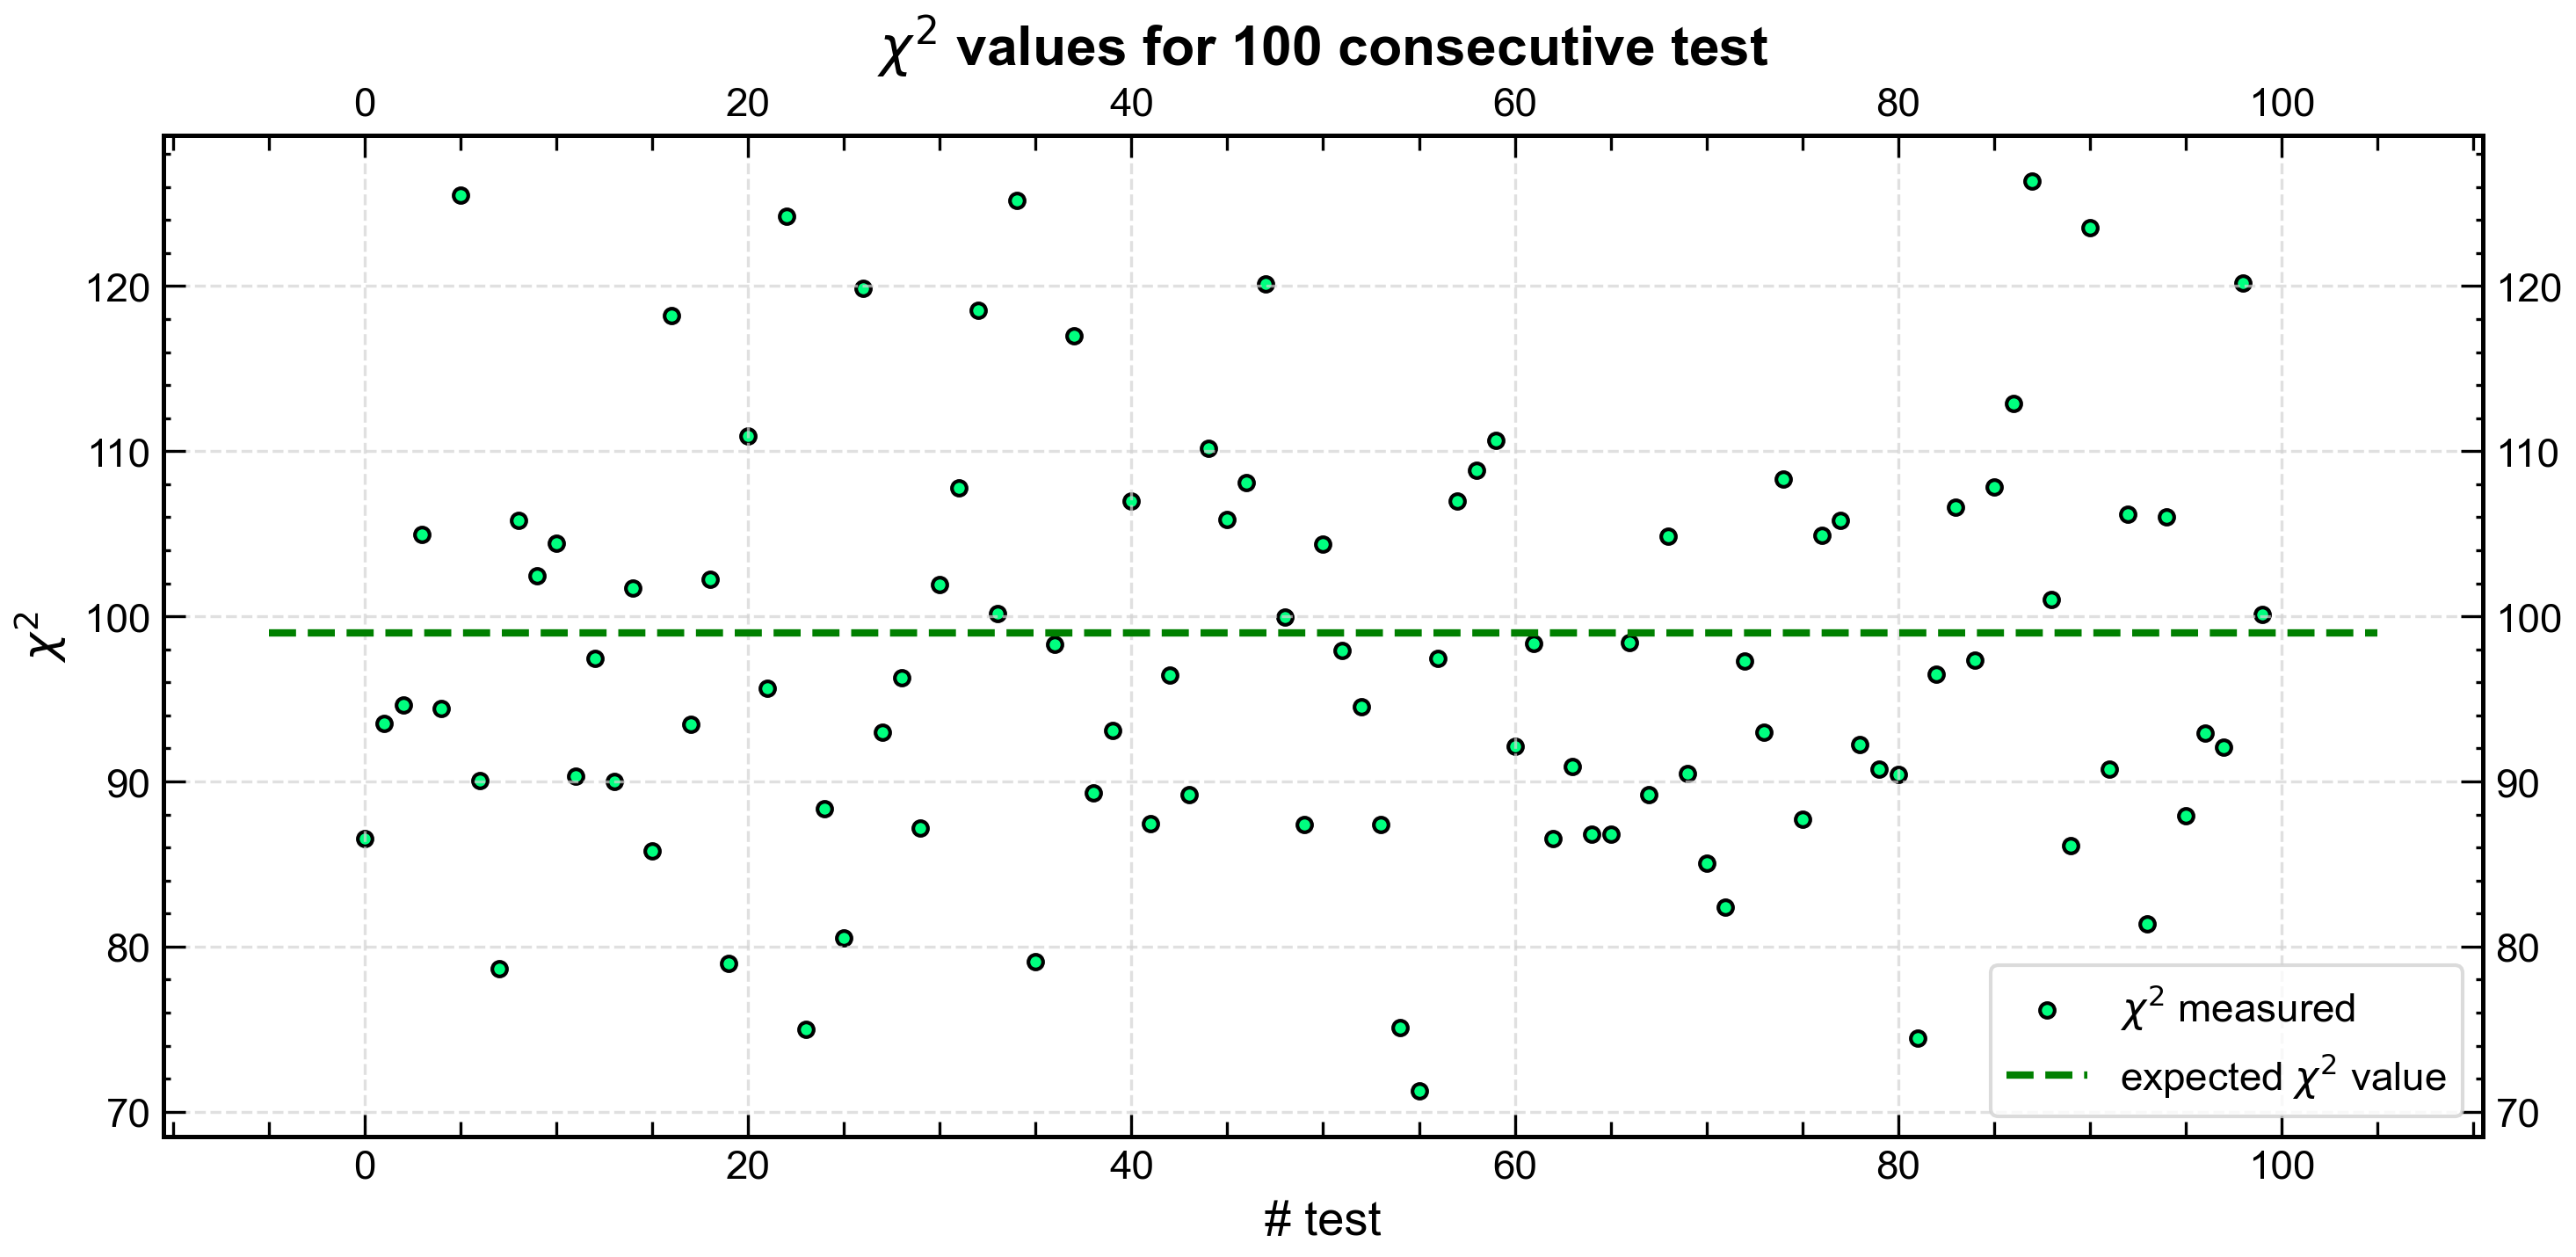

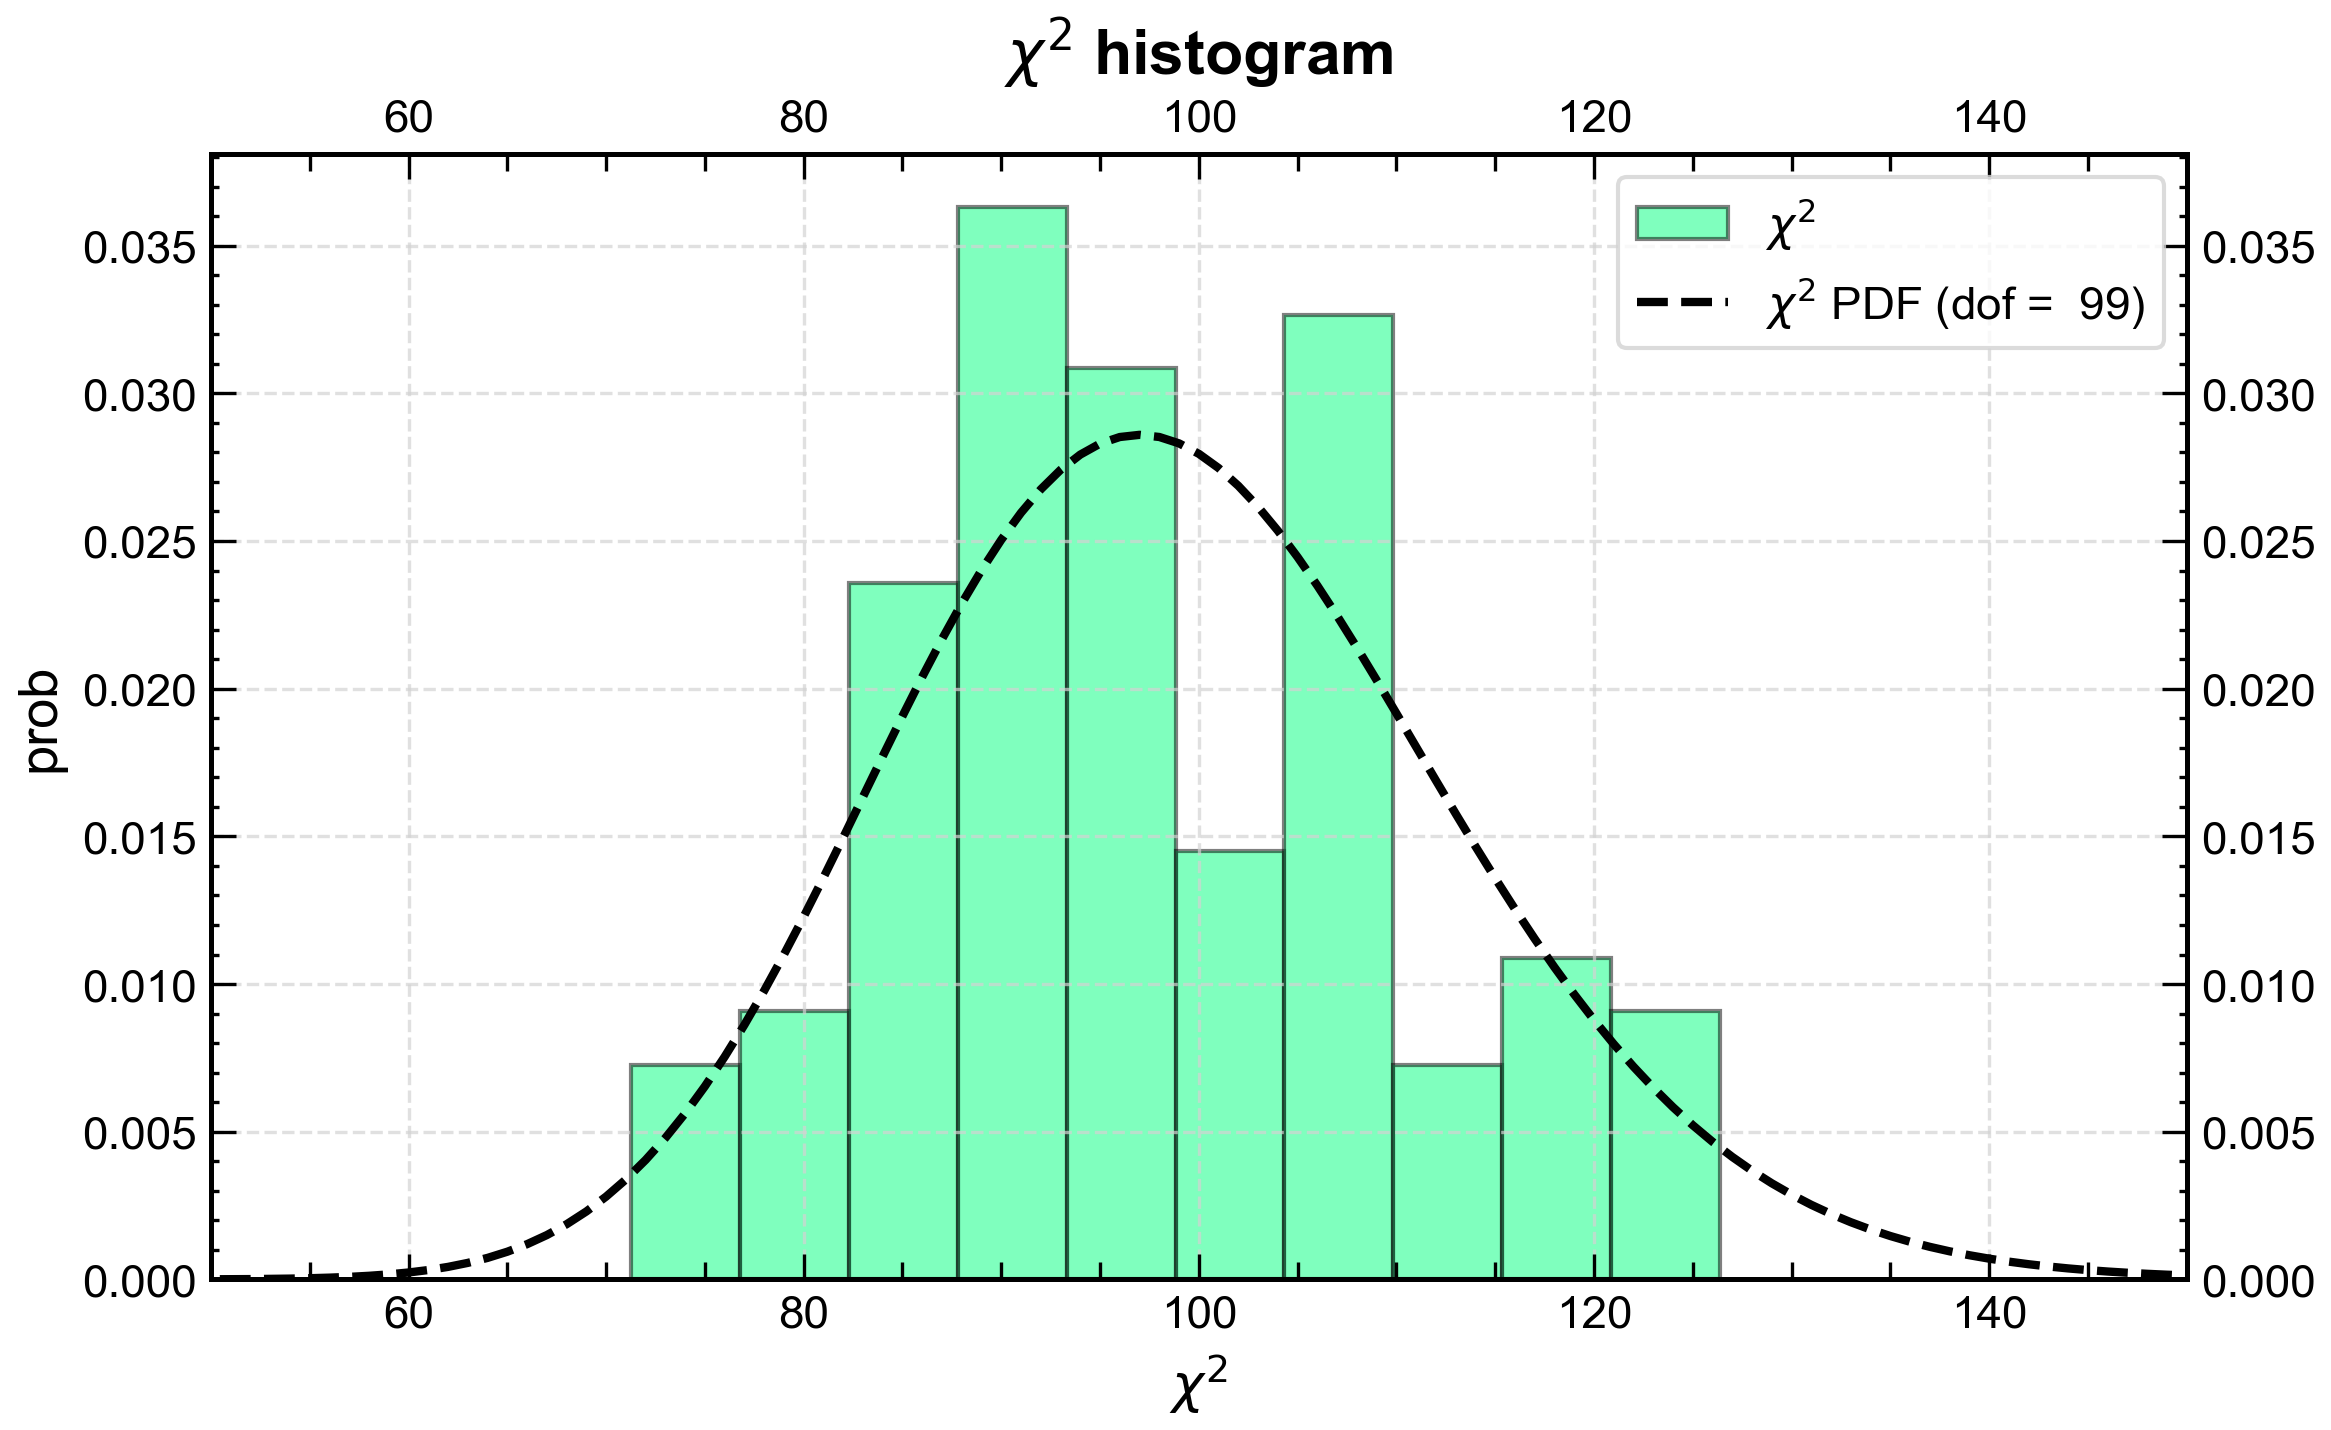

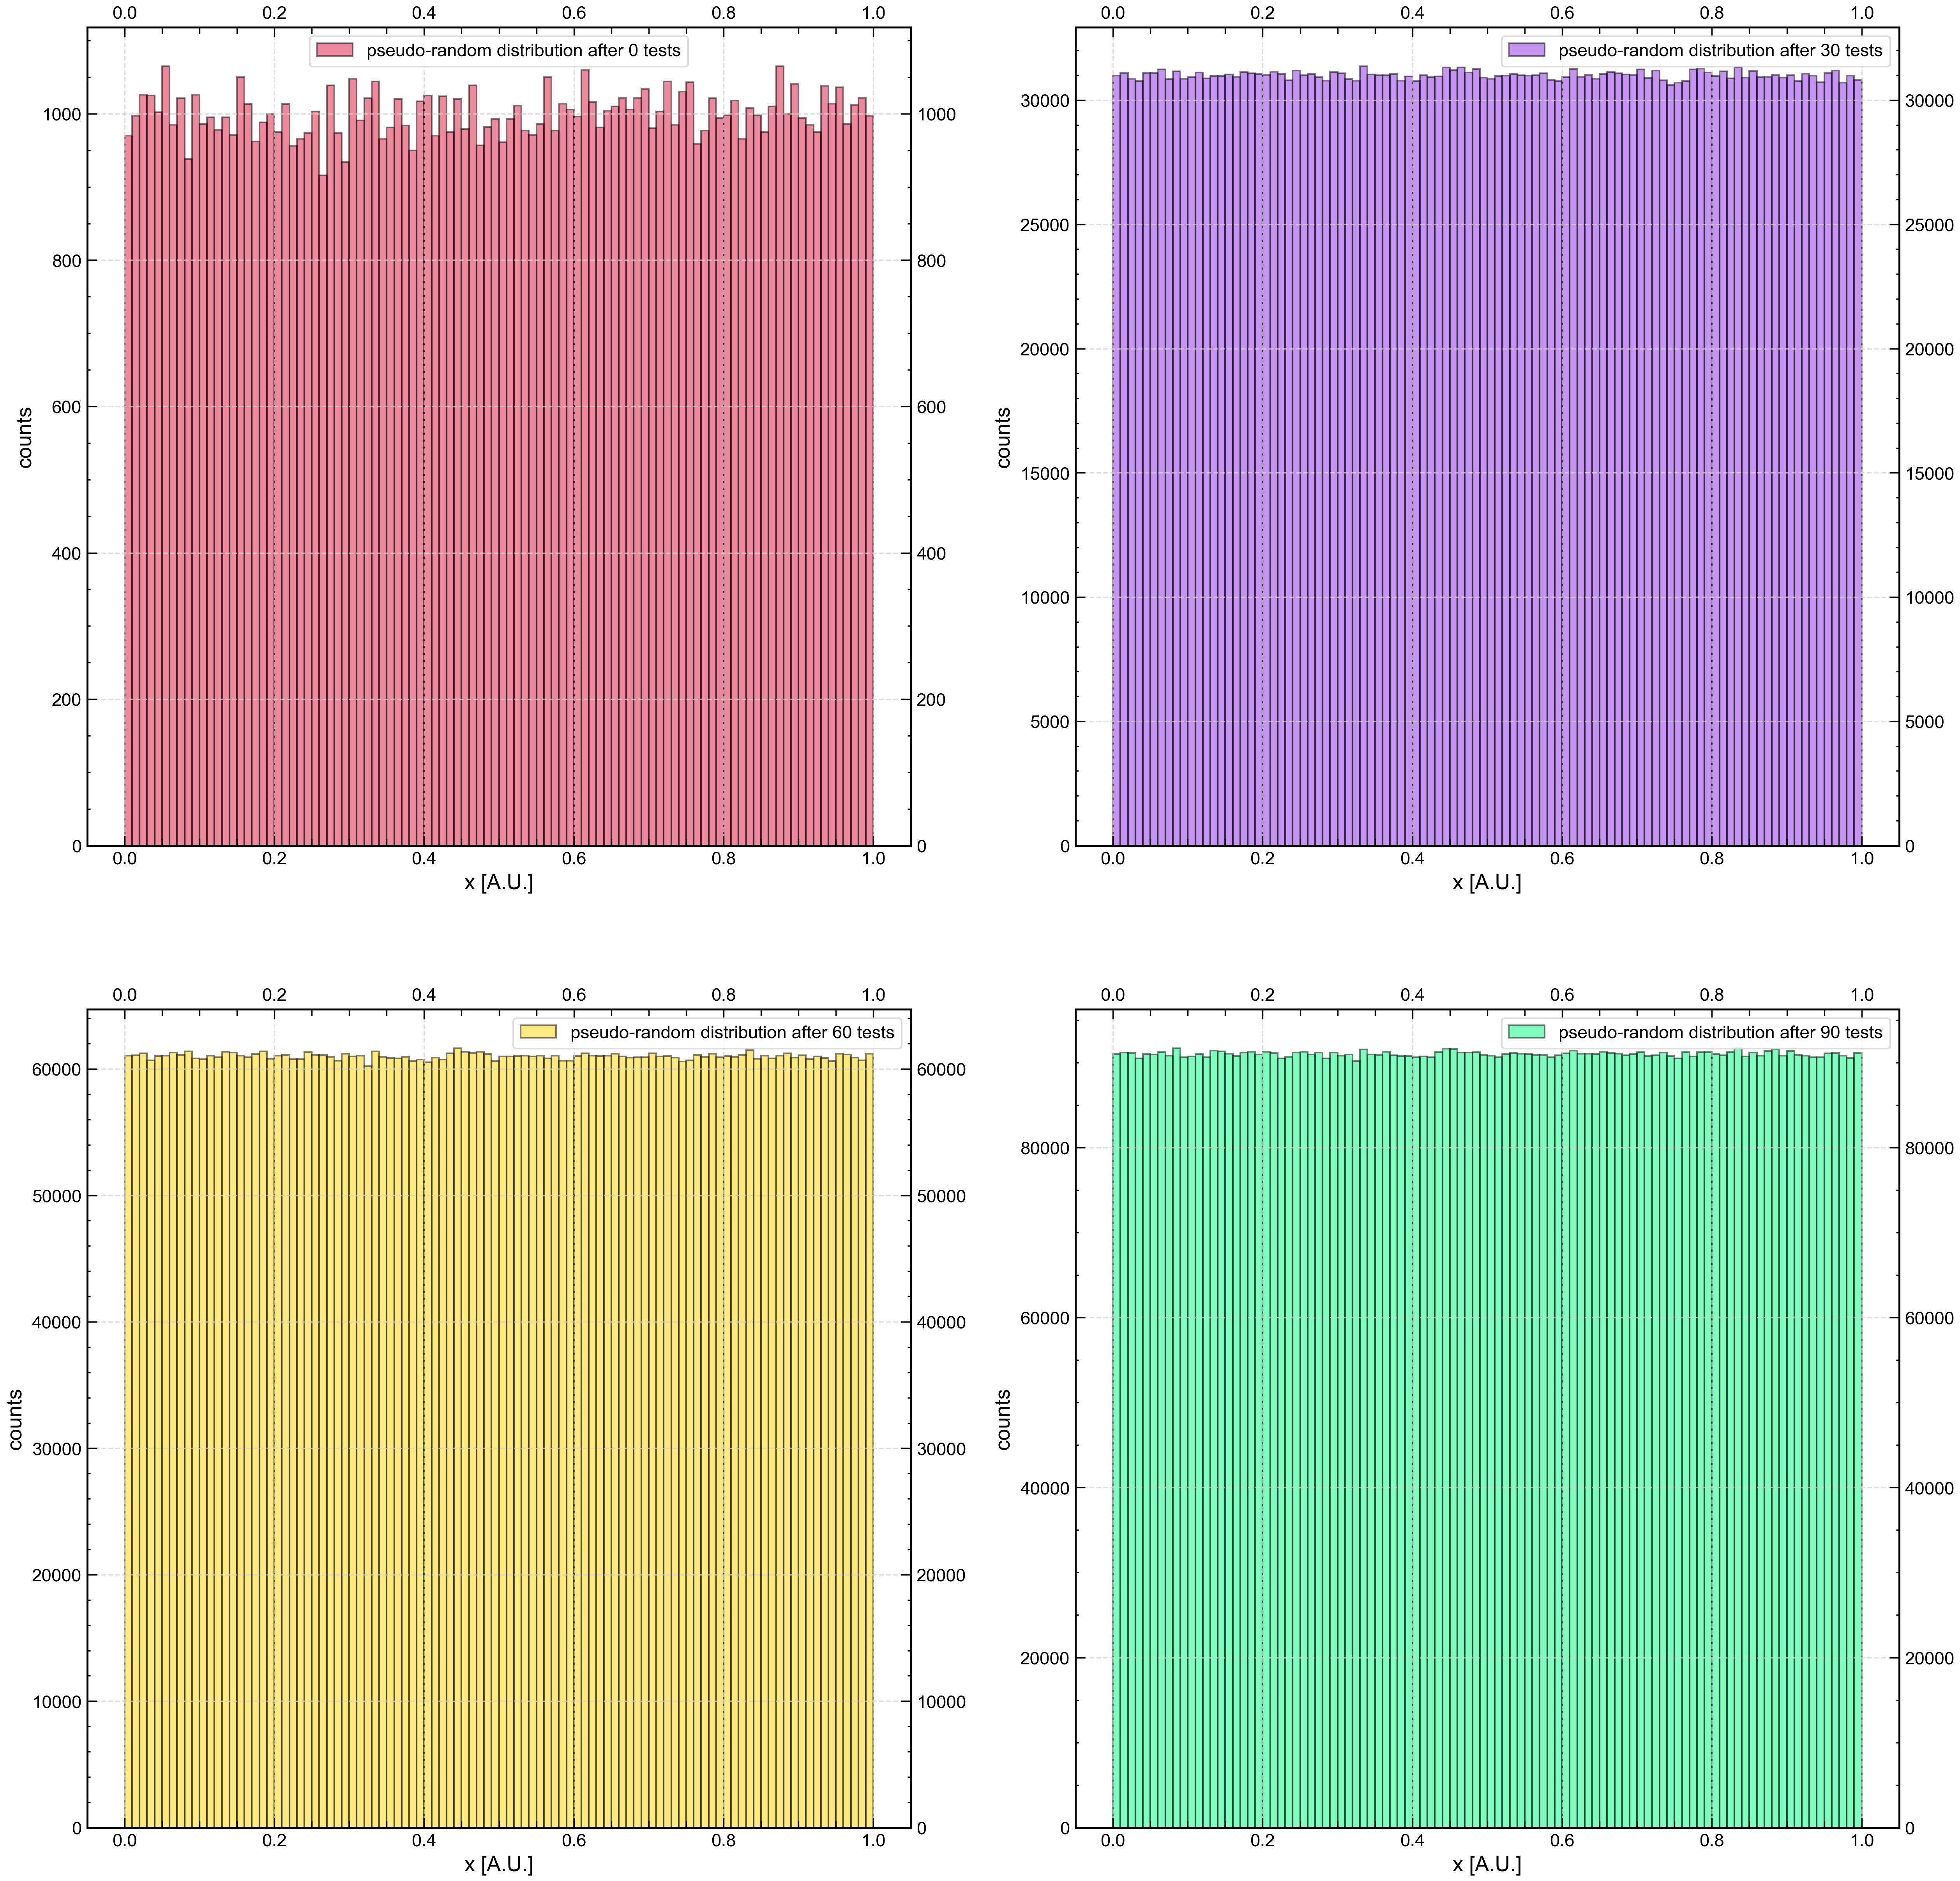

In [16]:
from scipy.stats import chi2

n_throws = 100000
n_bin = 100
exp = 100
ntest = 100
dof = 99
x, ChiSquared = np.loadtxt("es_1.1/OUTPUT/ChiSquared.data", usecols=(0,1), unpack = True)

fig = plt.figure(figsize = (10,5))
plt.title(r"$\chi^2$ values for 100 consecutive test")
plt.scatter(x, ChiSquared, color = "springgreen", marker = "o", edgecolors = "black", label = r"$\chi^2$ measured")
plt.hlines(dof, -5, ntest + 5, linestyle = "--", color = "green", label = r"expected $\chi^2$ value")
plt.xlabel("# test")
plt.ylabel(r"$\chi^2$")
plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.subplots_adjust()

plt.savefig("es_1.1/plots/chi_squared_vs_test.png")


fig = plt.figure(figsize = (8,5))
x = np.arange(0, 200)
plt.title(r"$\chi^2$ histogram")
plt.hist(ChiSquared, bins = 10, alpha = 0.5, color = "springgreen", edgecolor = "black", density = True, label = r"$\chi^2$")
ChiSquared_pdf = chi2.pdf(x, dof)
plt.plot(x, ChiSquared_pdf, color = "black", linestyle = "--", label = r"$\chi^2$ PDF (dof =  " + str(dof) + ")")
plt.xlim(50,150)
plt.legend(loc = "best")
# plt.grid(True)
plt.xlabel(r"$\chi^2$")
plt.ylabel("prob")

plt.tight_layout()
plt.subplots_adjust()

plt.savefig("es_1.1/plots/chi_squared_histo.png")

# create an empty list of strings and then assign to each element a name 
file_name = []

color = ["crimson", "blueviolet", "gold", "springgreen"]

fig = plt.figure(figsize = (20,20))
# plt.suptitle("Histograms")
for i in range(4):
    file_name.append("es_1.1/OUTPUT/ChiSquared_histo_after_" + str(i * 30) + "_tests.data")
    plt.subplot(2,2,i+1)
    bin, counts = np.loadtxt(file_name[i], usecols = (0,1), unpack = True)
    plt.bar(bin, counts, width= 2*bin[0], alpha = 0.5, color = color[i], edgecolor = "black", label = "pseudo-random distribution after " + str(30 * i) + " tests")
    plt.xlabel("x [A.U.]")
    plt.ylabel("counts")
    plt.legend(loc = "best")

plt.savefig("es_1.1/plots/uniform_distr.png")

plt.show()


In [17]:
for i in range(ntest):
    threshold = 0.05
    pvalue = chi2.sf(ChiSquared[i], dof) #survival function gives probability to find chisquared grater/equal to expected value
    if(pvalue <= threshold):
        print("TEST", i, " : -----> p-value :", format(pvalue, ".3f"))

TEST 5  : -----> p-value : 0.037
TEST 22  : -----> p-value : 0.044
TEST 34  : -----> p-value : 0.039
TEST 87  : -----> p-value : 0.033
TEST 90  : -----> p-value : 0.048


<h4>Conclusion</h4>


- The first scatter-plot shows each $\chi^2$ test result. We can see how $\chi^2$ values are distributed in a range $[70, 125]$ but are always quite close to the theoretical expected value of a $\chi^2$ distribution with $M-1=99$ degrees of freedom ($\langle \chi^2 \rangle = 99$).

- The second plot gives a more accurate esteem of how $\chi^2$ values are distributed. We can appreciate how the histogram is peaked around the expected value of $\chi^2$ PDF, with a little deviation ($\chi^2_{obs} \approx 97$ vs $\chi^2_{exp} = 99$). It can be attributed to statistical fluctuations due to the finite number of tests.

- The third plot shows the evolution of total counts per bin during evolution. Even though the number of counts per bin increases throughout the simulation, making harder to detect differences along bins, it can be qualitatively observed that the distribution remains consistently uniform for the entire simulation duration. I have implemented a routine in python that computes p-value for each $\chi^2$ test and prints which test shows a p-value smaller than the statistical threshold. Only 5 over 100 test return a p-value under $5%$.

Overall, the agreement with the theoretical distribution is satisfactory. We can conclude that, within the limits of the present analysis, the Pseudo-Random Number generator created by the NYU team generates pseudo-random numbers uniformly distributed in [0, 1).

<a id="implementation-of-pdf-sampling-algorithms-and-generalized-central-limit-theorem-verification"></a>
<h2><span style="color:darkviolet">Implementation of PDF sampling algorithms and generalized Central Limit Theorem verification</span></h2>

Once we have verified that the LCG generates pseudo-random numbers uniformly distributed in $[0, 1)$, we can now [add two methods](#inverse-transforming-sampling-method) in `Random` class that sample:

- a <span style="color:blue">generic exponential distribution</span>:

    $$p_{\lambda}(x) = \lambda e^{-\lambda x}$$

    where $\lambda > 0$ is called **rate parameter** and $x\in [0; +\infty]$;

- a <span style="color:blue">generic Lorentzian distribution</span>:

    $$p_{\mu , \Gamma}(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$
    
    where $\mu$ is called **location parameter** (specifies the location of the peak of the distribution), $\Gamma$ is called **scale parameter** (specifies the half-width half-maximum HWHM of the distribution) and $x\in [-\infty; +\infty]$.

We also want to [verify the CLT](#generalized-central-limit-theorem-verification) for $M = 10^4$ realizations of $X = \frac{1}{N} \sum_{i = 1}^{N}x_i$ (for $N = 1, 2, 10, 100$) being $x_i$ a pseudo-random variable sampled throwing a standard dice (case 1) , an exponential dice (case 2) where $\lambda = 1$ and a Lorentzian dice (case 3) where $\mu = 0$ and $\Gamma = 1$.

<a id="inverse-transforming-sampling-method"></a>
<h3><span style="color:darkviolet">Inverse Transforming Sampling Method</span></h3>

The key to solve this task relies on the **inverse transform sampling method**. Given a stochastic variable $x$, distributed as $p_x(x)$ with cumulative distribution $F_x(x)=\int_{-\infty}^{x}dx~p_x(x)$, and a function $y=y(x)$ this method allow us to know the analytic form of $p_y(y)$ and $F_y(y)$. They are computed as follow:

$$p_y(y) = p_x(x) \cdot \left| \frac{dy(x)}{dx} \right| ^{-1}$$

A powerful application of this method occurs when the function $y(x)$ is precisely the cumulative distribution function (CDF) of $p_x(x)$. In this case we find that $y$ is uniformly distributed in $[0,1)$ and this gives us a way to sample PDF using pseudo-random numbers uniformly distributed in $[0,1)$, provided the possibility to analytically integrate the PDF and invert the CDF.

<h4>Implementation</h4>
<h5><span style="color:darkviolet">Exponential distribution</span></h5>

The exponential distribution has a cumulative distribution:

$$y(x) = F_{\lambda}(x) = \int_{-\infty}^{x}dx~p_{\lambda}(x) = 1 - e^{-\lambda x}$$

which can be inverted:

$$x = - \frac{1}{\lambda}~ln(1-y)$$

Generating pseudo-random numbers $y$ uniformly distributed in $[0;1)$, we get that $x$ is distributed as $p_{\lambda}(x)$.

This analytical solution has been implemented into the method `Exponential` of file `random.cpp` as follow:

````cpp
    double Random::Exponential(double lambda){
        if(lambda <= 0){
            cerr << "Random::Exponential(double lambda) ERROR : lambda 
            has to be positive" << endl ;
        }
        return ((-1.) * log(1. - Rannyu())) / lambda ;
    }
````

<h5><span style="color:darkviolet">Cauchy-Lorentz distribution</span></h5>

The Cauchy-Lorentz distribution has a cumulative distribution:

$$y(x) = F_{\mu, \Gamma}(x) = \int_{-\infty}^{x}dx~p_{\mu, \Gamma}(x) = \frac{1}{\pi}~tan^{-1}\frac{x}{\Gamma} + \frac{1}{2}$$

which can be inverted:

$$x = \Gamma ~ tan\left[ \pi \left( y - \frac{1}{2} \right) \right]$$

Generating pseudo-random numbers $y$ uniformly distributed in $[0;1)$, we get that $x$ is distributed as $p_{\mu, \Gamma}(x)$.

This analytical solution has been implemented into the method `Lorentzian` of file `random.cpp` as follow:

````cpp
    double Random::Lorentzian(double gamma, double center){
        if(gamma <= 0){
            cerr << "Random::Lorentzian(double gamma, double centervalue) ERROR : gamma has to be positive" << endl ;
        }
        return center + gamma * (tan(M_PI * (Rannyu() - 0.5))) ;
    }
````

<a id="generalized-central-limit-theorem-verification"></a>
<h3><span style="color:darkviolet">Generalized Central Limit Theorem verification</span></h3>

Let $X_1, X_2, \dots, X_N$ be i.i.d. random variables and define their partial sum as

$$S_N = \sum_{i=1}^N X_i$$

with corresponding sample mean:

$$A_N = \frac{S_N}{N}$$


**Central Limit Theorem (finite variance)**

If all $X_i$ have same finite mean $\mu$ and variance $\sigma^2$, then: 

- $\langle A_N \rangle \to \mu$
  
- $\sigma_{A_N}^2 \to \frac{\sigma^2}{N}$

- $A_N$ distirbution converges to a Normal distribution $\mathcal{N}(\mu,\frac{\sigma^2}{N})$

as $N \to \infty.$

**Generalized Central Limit Theorem (stable laws).**  

If the $X_i$ follow a heavy-tailed distribution in the domain of attraction of a stable law with stability index $\alpha \in (0,2)$, then the normalized sum $S_N$ converges to an $\alpha$-stable distribution.  
In particular, for the **Cauchy–Lorentz** case ($\alpha = 1$), $X_i \sim \mathrm{Cauchy}(\mu,\Gamma)$ is already a stable law: the average $A_N$ has the same distribution $\mathrm{Cauchy}(\mu,\Gamma)$ for all $N$.  
Thus, unlike the finite-variance case, the distribution of $A_N$ does **not** collapse to a Gaussian and retains the heavy tails of the Cauchy distribution.

<h5><span style="color:darkviolet">Uniform distribution</span></h5>

Uniform distribution in $[a ; b]$ has mean $\mu=\frac{a+b}{2}$ and variance $\sigma^2=\frac{(b-a)^2}{12}<+\infty$. If we consider $x_i$ pseudo-random numbers uniformly distributed in $[0;1)$, they have :
- $\mu_i = 0.5$;
- $\sigma_{i}^{2} = \frac{1}{12} < +\infty$;

$\forall ~ \text{i}= 1, \dots , N$ and the CLT hypotesis are verified.

CLT tells us that a new random variable $A_N = \frac{1}{N}\sum_{i = 0}^N x_i$ has:
- mean value $\langle A_N \rangle = M \to \mu_i$;
- variance $\Sigma^2 \to \frac{\sigma_i^2}{N}$ 

as $N\to+\infty$ and is distributed as a **Gaussian distribution** with $\mu = M$ and $\sigma^2 = \Sigma^2$.

<span style = "color : green"> An uniform distribution has as **limiting distribution** a *Gaussian PDF* so it falls into the **basin of attraction** of the Gaussian distribution</span>

Best Gaussian fit parameters for N = 1 :
MEAN :  0.498
STANDARD DEVIATION :  0.288
Best Gaussian fit parameters for N = 2 :
MEAN :  0.501
STANDARD DEVIATION :  0.203
Best Gaussian fit parameters for N = 10 :
MEAN :  0.501
STANDARD DEVIATION :  0.091
Best Gaussian fit parameters for N = 100 :
MEAN :  0.500
STANDARD DEVIATION :  0.029


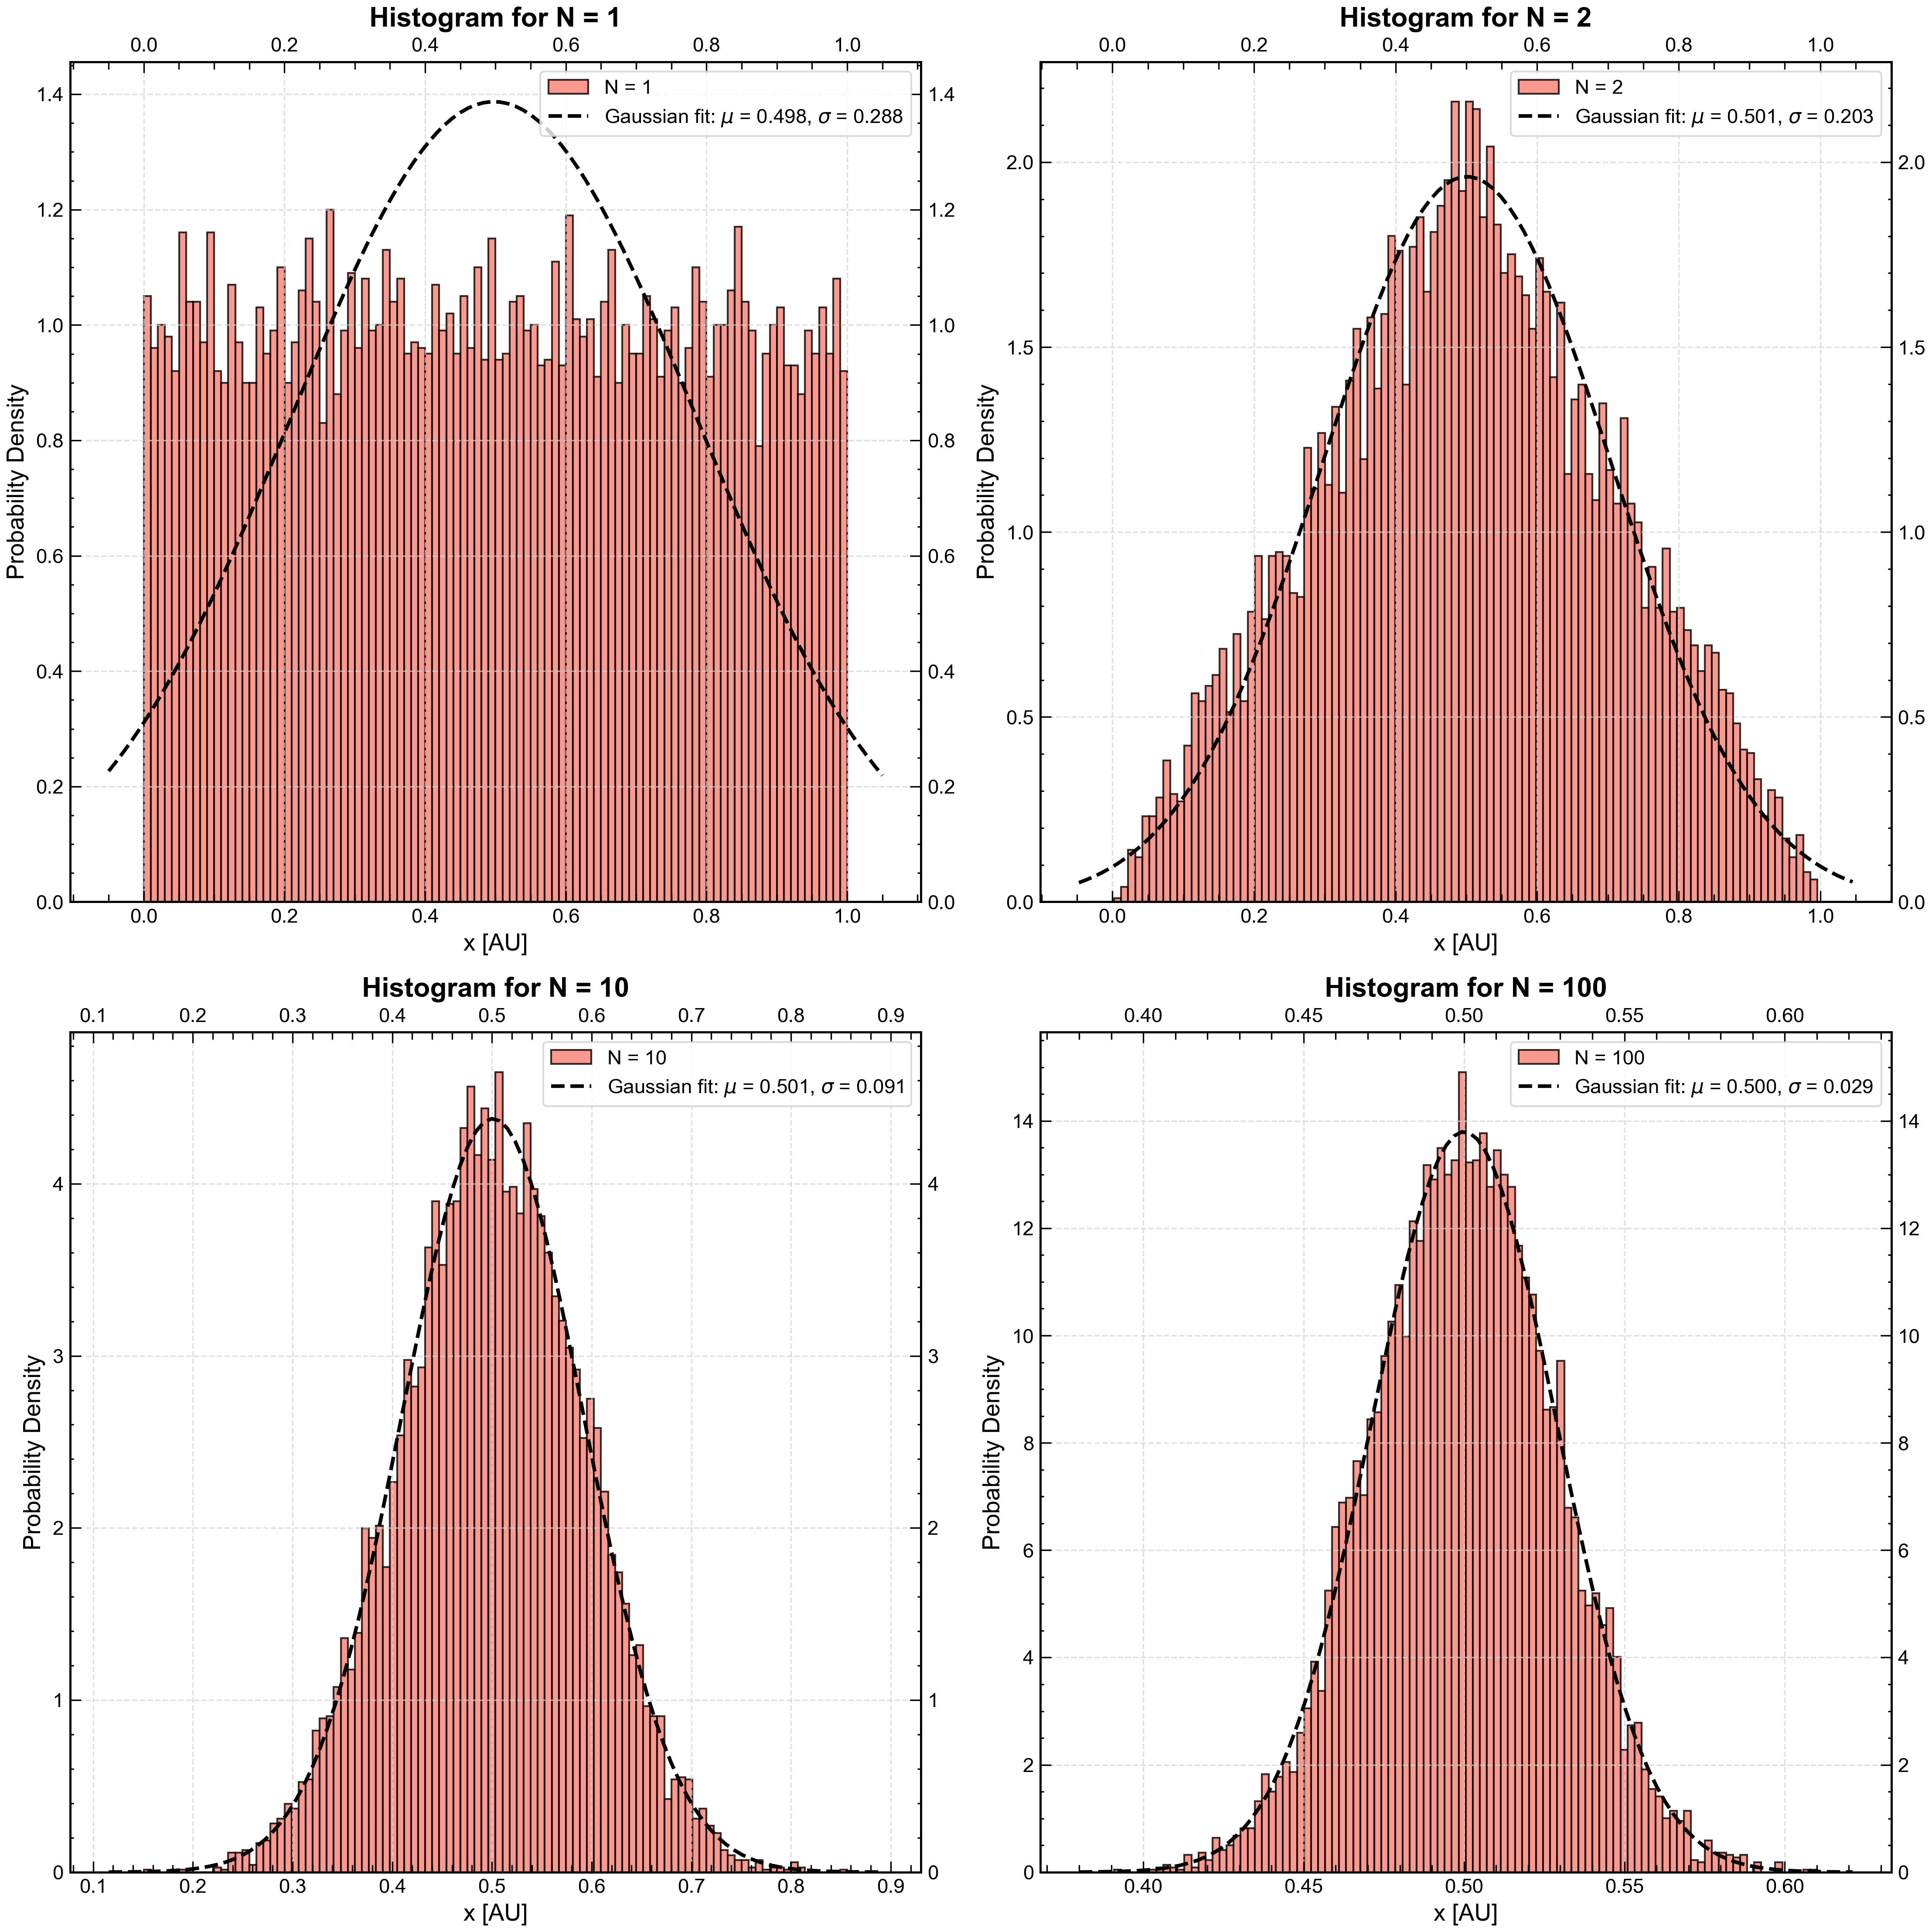

In [18]:
# to fit dataset
from scipy import stats

N = [1, 2, 10, 100]
# Loading the dataset from a file into 4 numpy lists
val = np.loadtxt("es_1.2/OUTPUT/unif.data", usecols = (0, 1, 2, 3), unpack = True)
n_bins = 100

# Creating 4 subplots and a figure
fig, histo = plt.subplots(2, 2, figsize = (15, 15))

# Filling the histograms and features
for i in range(2):
    for j in range(2):
        index = i * 2 + j
        # Filling histogram
        histo[i, j].hist(val[index], n_bins, alpha = 0.8, color = "salmon", edgecolor = "black", label = "N = " + str(N[index]), density = True)
        
        # Gaussian fit
        #if(index == 3) :
            
        # Gaussian best parameters to fit dataset
        mean, std_dev = stats.norm.fit(val[index])
        # Histo xmin and xmax to draw gaussian distribution
        xmin, xmax = histo[i, j].get_xlim()
        # Array 100 points equally spaced in [xmin, xmax] to create Gaussian PDF
        x = np.linspace(xmin, xmax, 100)
        # Creating Gaussian PDF
        gauss = stats.norm.pdf(x, mean, std_dev)
        
        # Drawing Gaussian PDF
        histo[i, j].plot(x, gauss, color = "black", linestyle = "--", label = rf"Gaussian fit: $\mu$ = {format(mean, ".3f")}, $\sigma$ = {round(std_dev, 3)}")

        # Printing the Gaussian fit parameters 
        print("Best Gaussian fit parameters for N = " + str(N[index]) + " :")
        print("MEAN : ", format(mean, ".3f"))
        print("STANDARD DEVIATION : ", round(std_dev, 3))
        
        # Adding titles and labels
        histo[i, j].set_title(f'Histogram for N = {N[index]}')
        histo[i, j].set_xlabel("x [AU]")
        histo[i, j].set_ylabel("Probability Density")
        histo[i, j].legend()

# Adjusting the layout
plt.tight_layout()
plt.subplots_adjust()

plt.savefig("es_1.2/plots/unif_dist.png")

plt.show()

<h4>Conclusion</h4>

We can see from the plots above that, as N values becomes bigger :
- the mean of N pseudo-random variables, sampling a uniform distribution, is distributed $(N = 100)$ as a Normal distribution with $\mu = 0.5$ and $\sigma = 0.029$;
- the standard deviation of the distribution decreases ($\sigma = 0.288, N = 1$ vs $\sigma = 0.029, N = 100$) as predicted by the CLT;
- Normal distribution for $N = 1$ does not fit the uniform distribution (we are not in the limit of "big" $N$).

<h5><span style="color:darkviolet">Exponential distribution</span></h5>

Exponential distribution has mean $\mu=\frac{1}{\lambda}$ and variance $\sigma^2=\frac{1}{\lambda^2}<+\infty$ since $\lambda > 0$. If we consider $x_i$ pseudo-random numbers exponetially distributed in $[0;+\infty)$ with $\lambda = 1$, they have :
- $\mu_i = 1$;
- $\sigma_{i}^{2} = 1 < +\infty$;

$\forall ~ \text{i}= 1, \dots , N$ and the CLT hypotesis are verified.

CLT tells us that a new random variable $A_N = \frac{1}{N}\sum_{i = 0}^N x_i$ has:
- mean value $\langle A_N \rangle = M \to\mu_i$;
- variance $\Sigma^2 \to \frac{\sigma_i^2}{N}$ 

as $N\to+\infty$ and is distributed as a **Gaussian distribution** with $\mu = M$ and $\sigma^2 = \Sigma^2$.

<span style = "color : green"> An exponential distribution has as **limiting distribution** a *Gaussian PDF* so it falls into the **basin of attraction** of the Gaussian distribution</span>

Best Gaussian fit parameters with N = 1 :
MEAN :  1.0
STANDARD DEVIATION :  1.01
Best Gaussian fit parameters with N = 2 :
MEAN :  1.0
STANDARD DEVIATION :  0.69
Best Gaussian fit parameters with N = 10 :
MEAN :  1.0
STANDARD DEVIATION :  0.32
Best Gaussian fit parameters with N = 100 :
MEAN :  1.0
STANDARD DEVIATION :  0.1


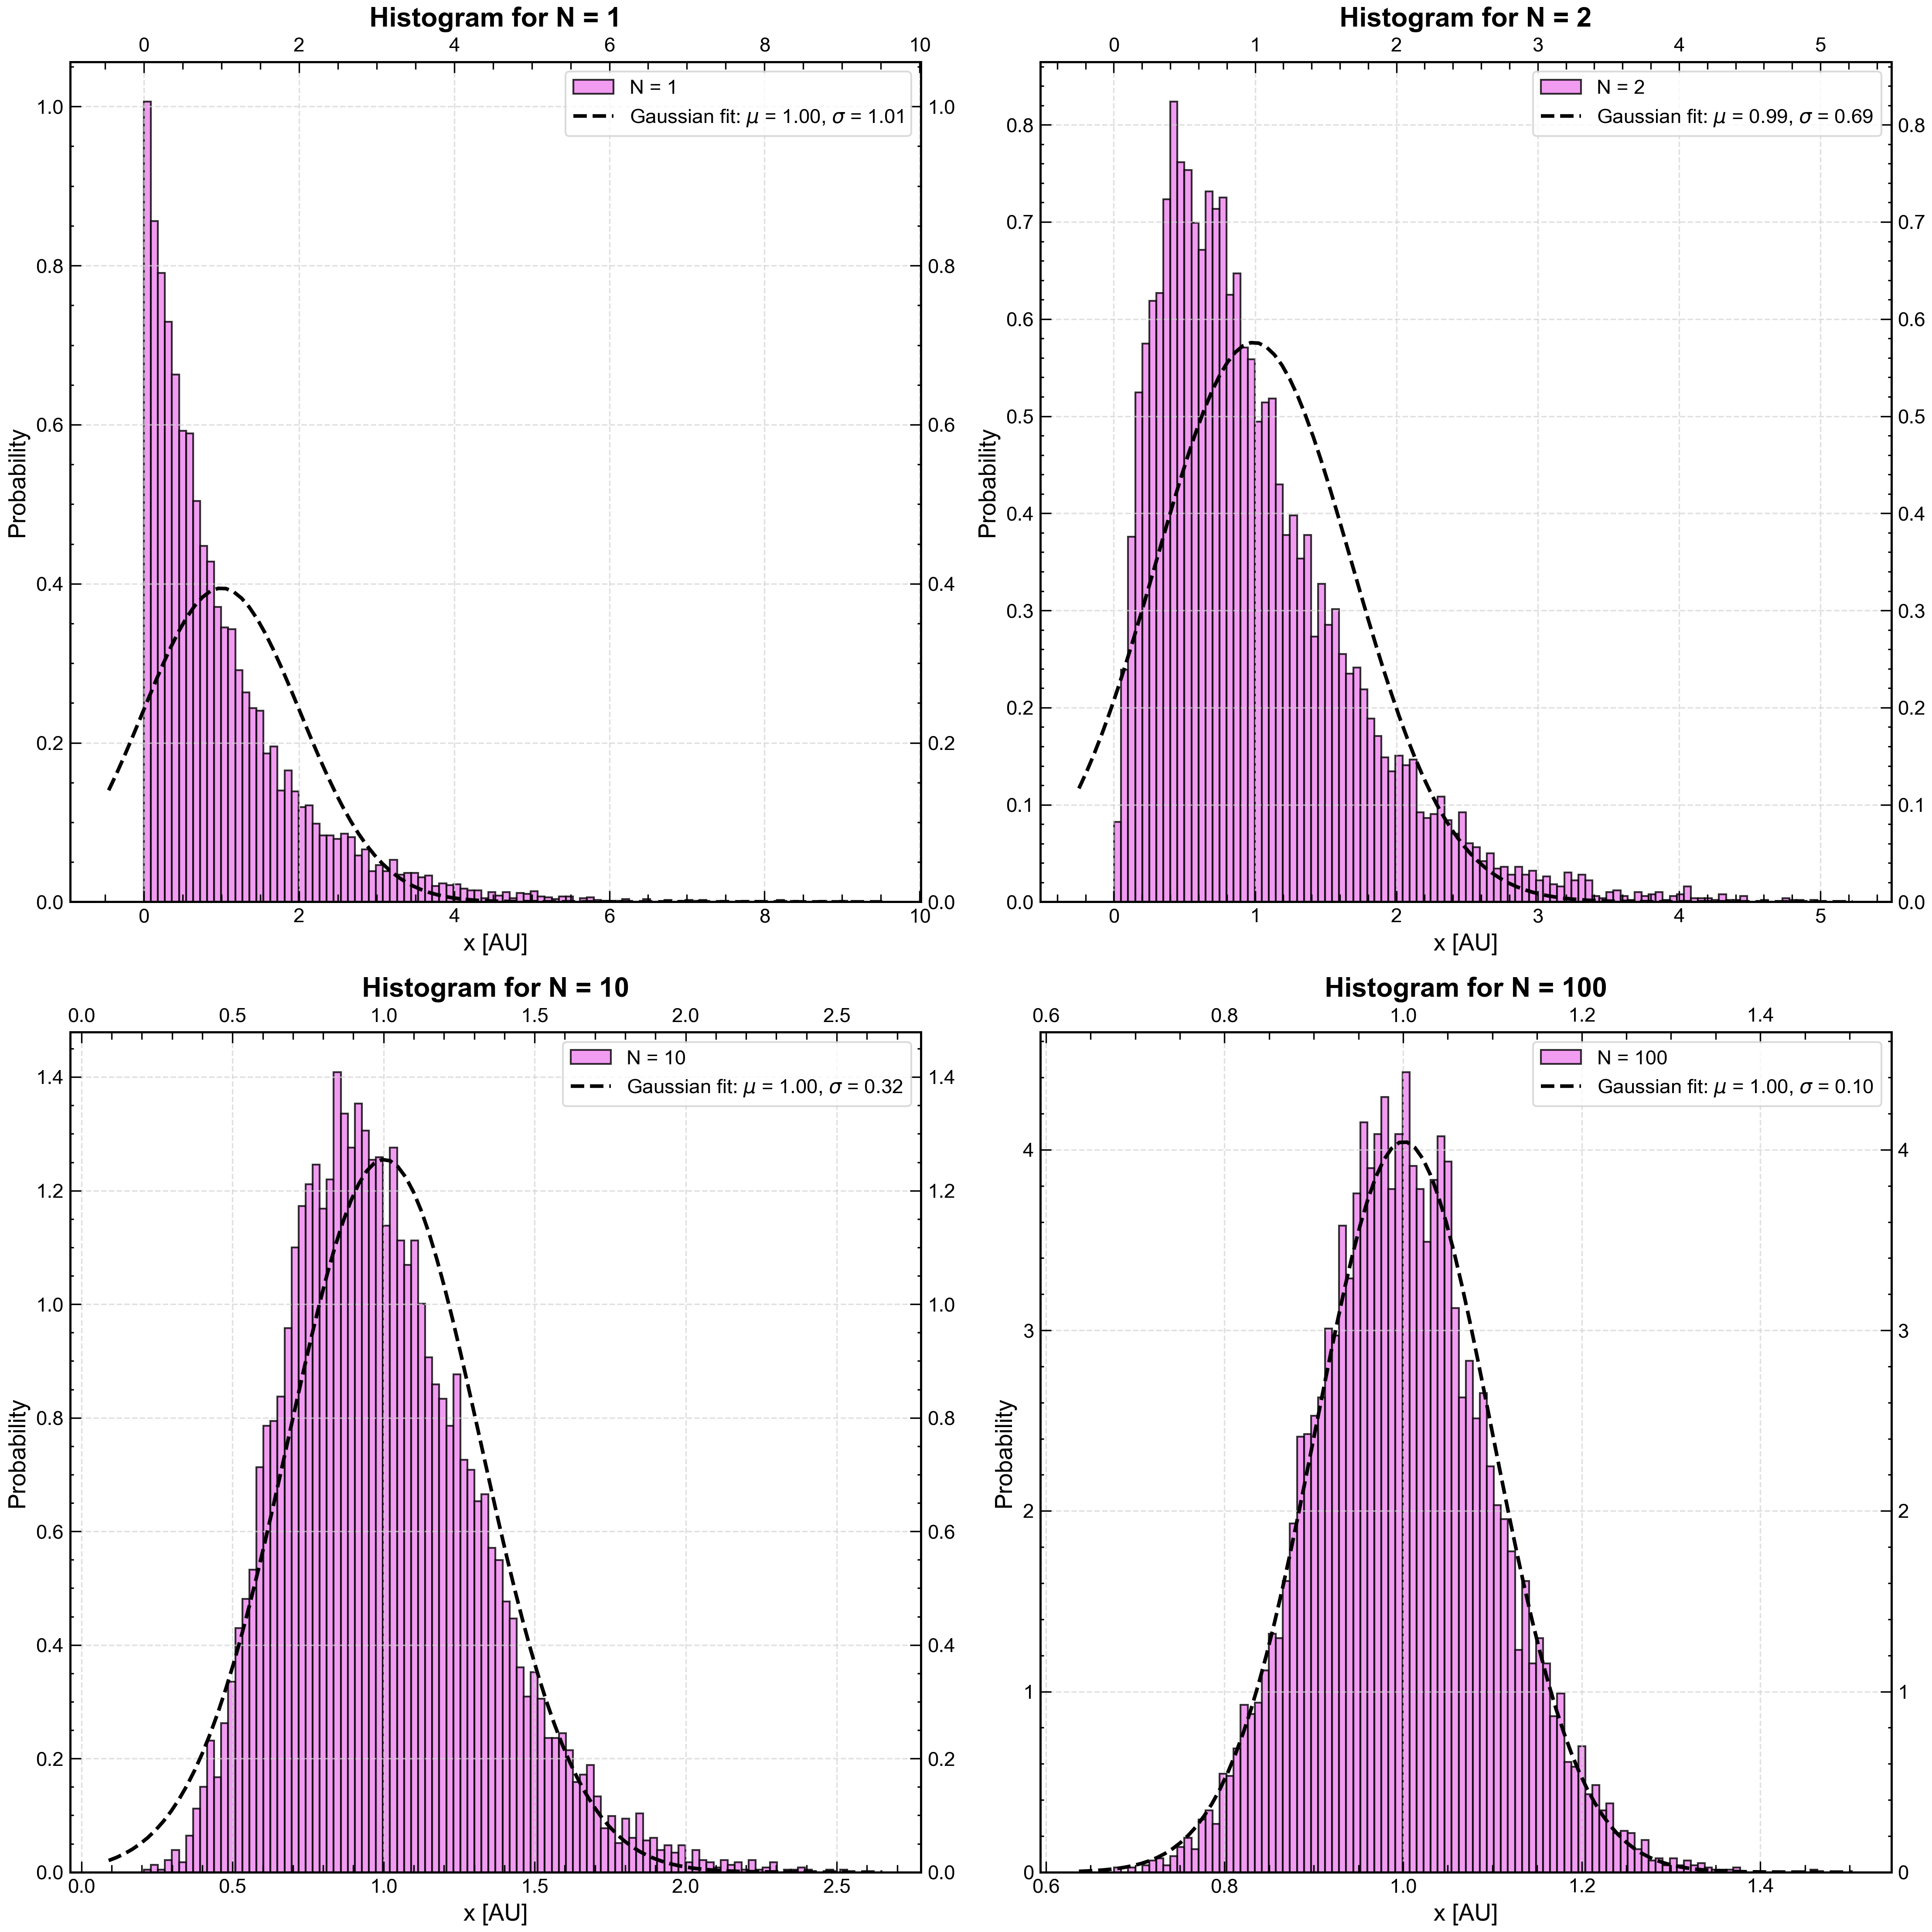

In [19]:
# Loading the dataset from a file into a list of 4 arrays
val = np.loadtxt("es_1.2/OUTPUT/exp.data", usecols = (0, 1, 2, 3), unpack = True)

# Creating 4 subplots and a figure
fig, histo = plt.subplots(2, 2, figsize = (15, 15))
N = [1, 2, 10, 100]
n_bins = 100

# Filling the histograms and features
for i in range(2):
    for j in range(2):
        index = i * 2 + j
        # Filling histogram
        histo[i, j].hist(val[index], n_bins, alpha = 0.8, color = "violet", edgecolor = "black", label = "N = " + str(N[index]), density = True)
        
        # Gaussian fit
        #if(index == 3) :
        # Gaussian best parameters to fit dataset
        mean, std_dev = stats.norm.fit(val[index])
        # Histo xmin and xmax to draw gaussian distribution
        xmin, xmax = histo[i, j].get_xlim()
        # Array 100 points equally spaced in [xmin, xmax] to create Gaussian PDF
        x = np.linspace(xmin, xmax, 100)
        # Creating Gaussian PDF
        gauss = stats.norm.pdf(x, mean, std_dev)
        
        # Drawing Gaussian PDF
        histo[i, j].plot(x, gauss, color = "black", linestyle = "--", label = rf"Gaussian fit: $\mu$ = {format(mean, ".2f")}, $\sigma$ = {format(std_dev, ".2f")}")

        # Printing the Gaussian fit parameters
        print("Best Gaussian fit parameters with N = " + str(N[index]) + " :")
        print("MEAN : ", format(mean, ".1f"))
        print("STANDARD DEVIATION : ", round(std_dev, 2))
        
        # Adding titles and labels
        histo[i, j].set_title(f'Histogram for N = {N[index]}')
        histo[i, j].set_xlabel("x [AU]")
        histo[i, j].set_ylabel("Probability")
        histo[i, j].legend()

# Adjusting the layout
plt.tight_layout()
plt.subplots_adjust()

plt.savefig("es_1.2/plots/exp_dist.png")

plt.show()

<h4>Conclusion</h4>

We can see from the plots above that, as N values becomes bigger :
- the mean of N pseudo-random variables, sampling a exponential distribution, is distributed $(N = 100)$ as a Normal distribution with $\mu = 1.00$ and $\sigma = 0.10$;
- the standard deviation of the distribution decreases ($\sigma = 1.01, N = 1$ vs $\sigma = 0.10, N = 100$) as predicted by the CLT;
- Normal distribution for $N = 1$ does not fit the uniform distribution (we are not in the limit of "big" $N$).

<h5><span style="color:darkviolet">Cauchy-Lorentz distribution</span></h5>

The case of pseudo-random variables sampling Lorentzian distributions is a little bit trickier. This because both mean and second central moment of the Cauchy-Lorentzian distribution, which occurs in many physical situations, **are not finite** so the classic CLT does not apply on it. Therefore this distribution is a stable distribution and the distribution of the sample mean remains unchanged.


<span style = "color : green"> A Cauchy-Lorentz distribution has as **limiting distribution** a *Cauchy-Lorentz PDF*  itself, so it falls into the **basin of attraction** of the Cauchy-Lorentz distribution</span>

Best Lorentzian fit parameters with N = 1 :
CENTER VALUE :  0.00
HWHM :  1.0
Best Lorentzian fit parameters with N = 2 :
CENTER VALUE :  0.02
HWHM :  1.0
Best Lorentzian fit parameters with N = 10 :
CENTER VALUE :  -0.00
HWHM :  0.99
Best Lorentzian fit parameters with N = 100 :
CENTER VALUE :  0.00
HWHM :  0.99


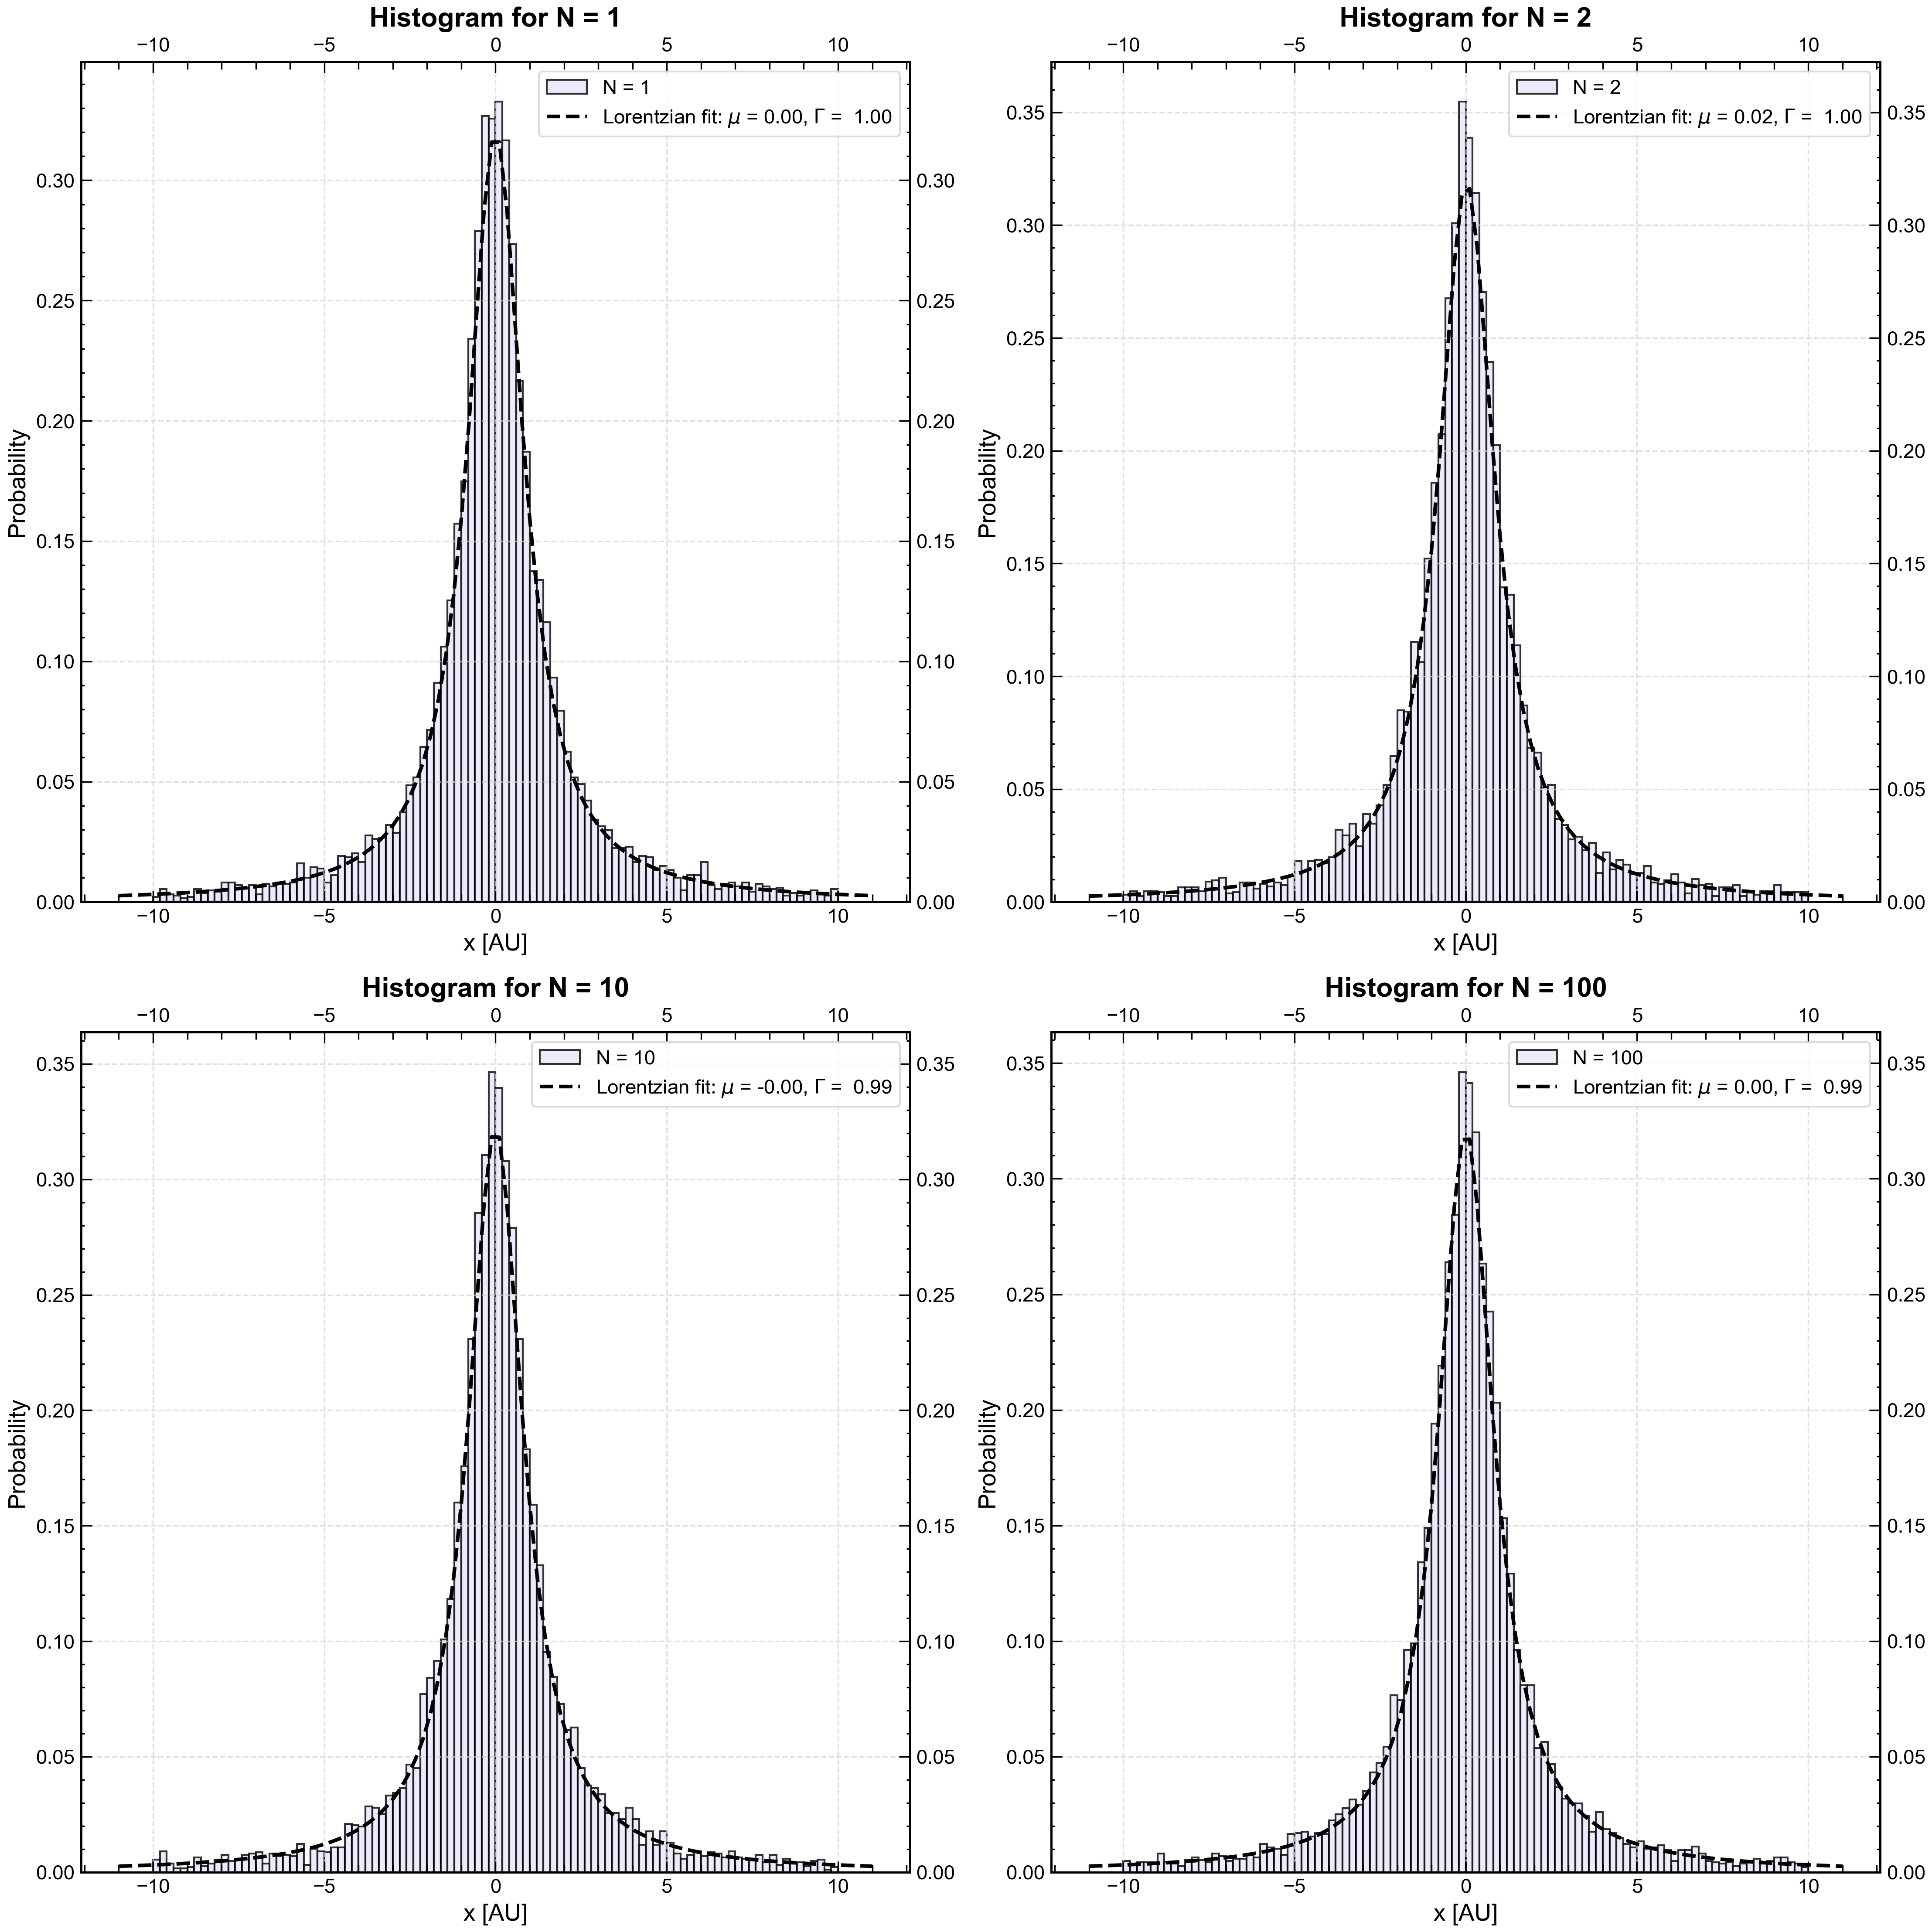

In [20]:
# Loading the dataset from a file into a list of 4 arrays
val = np.loadtxt("es_1.2/OUTPUT/lor.data", usecols = (0, 1, 2, 3), unpack = True)

# Creating 4 subplots and a figure
fig, histo = plt.subplots(2, 2, figsize = (15, 15))
N = [1, 2, 10, 100]
n_bins = 100

# Filling the histograms and features
for i in range(2):
    for j in range(2):
        index = i * 2 + j
        # Filling histogram
        histo[i, j].hist(val[index], n_bins, range = (-10, 10), alpha = 0.8, color = "lavender", edgecolor = "black", label = "N = " + str(N[index]), density = True)
        
        # Lorentzian fit
        # Lorentzian best parameters to fit dataset
        center, HWHM = stats.cauchy.fit(val[index])
        # Histo xmin and xmax to draw Lorentzian distribution
        xmin, xmax = histo[i, j].get_xlim()
        # Array 100 points equally spaced in [xmin, xmax] to create Lorentzian PDF
        x = np.linspace(xmin, xmax, 100)
        # Creating Lorentzian PDF
        lor = stats.cauchy.pdf(x, center, HWHM)
        
        # Drawing Lorentzian PDF
        histo[i, j].plot(x, lor, color = "black", linestyle = "--", label = rf"Lorentzian fit: $\mu$ = {format(center, ".2f")}, $\Gamma$ =  {format(HWHM, ".2f")}")
        
        # Adding titles and labels
        histo[i, j].set_title(f'Histogram for N = {N[index]}')
        histo[i, j].set_xlabel("x [AU]")
        histo[i, j].set_ylabel("Probability")
        histo[i, j].legend()

        # Printing the Lorentzian fit parameters
        print("Best Lorentzian fit parameters with N = " + str(N[index]) + " :")
        print("CENTER VALUE : ", format(center, ".2f"))
        print("HWHM : ", round(HWHM, 2))

# Adjusting the layout
plt.tight_layout()
plt.subplots_adjust()

plt.savefig("es_1.2/plots/lor_dist.png")

plt.show()

<h4>Conclusion</h4>

We can see from the plots above that, as N values becomes bigger the mean of N pseudo-random variables, sampling a Cauchy-Lorentz distribution remains unchanged, with **location parameter** $\mu = 0$ and **scale parameter** $\Gamma = 1$ as predicted by the GCLT.

<a id="buffons-experiment"></a>
<h2><span style="color:darkviolet">Buffon's experiment</span></h2>

It consists in throwing at random a needle of length _L_ onto an horizontal plane ruled with straight lines at distance _d_ (where $d > L$).
Compte De Buffon carried out the analytical expression of the problem, showing that the probability is given by: 
$$P = \frac{2L}{\pi d}$$
Performing the experiment we can throw at random the needle (making sure that the needle are thrown at random actually) and counts how many times the needle intersects the horizontal lines (`hit`) compared to the total number of throws (`thr`). In this case the probability is given by the ratio between `hit` and `thr` as the number of throws becomes high: 
$$P = \lim_{N_{thr} \to \infty} \frac{N_{hit}}{N_{thr}}$$ 
By reversing the probability expression we can evaluate $\pi$ substituting P with its analytic form:
$$\pi = \lim_{N_{thr}\to \infty} \frac{2LN_{thr}}{N_{hit}d}$$

My code is developed in two different section:
- [sampling uniform angle in $[0, 2\pi]$](#sampling-uniform-angle-in-02pi);

- [Compte De Buffon's experiment simulation](#implementation).

<a id="sampling-uniform-angle-in-02pi"></a>
<h3><span style="color:darkviolet">Sampling uniform angle in $[0, 2\pi]$</span></h3>


For the simulation, it is crucial to uniformly generate an angle $\theta$ in the interval $[0;2\pi]$ (or an equivalent one like $[−\pi;\pi]$) without relying on the value of $\pi$ a priori.

The chosen method leverages the geometry of the unit circle and the properties of inverse trigonometric functions. We repeatedly sample a point $(x,y)$ within a square of side 2 centered at the origin, using the `Rannyu(-1.0, 1.0)` method. Only points that fall within the unit circle (i.e. $\sqrt{x^2 + y^2} \le 1$) and are not the origin $(0,0)$ are accepted, thus ensuring a uniform sampling of points on the disk. Once an accepted point is obtained, the angle $\theta$ is determined by the **arccosine** of the ratio between the $x$ coordinate and the vector's magnitude:

$$\theta = \frac{x}{\sqrt{x^2+y^2}}$$

The angle $\theta$ is multiplied by the sign of the y coordinate (`sign(y)`) to extend the sampling to the full interval $[−\pi;\pi]$ ($\mathbb{arccos}$ function itself returns an angle in the interval $[0;\pi]$). If $y>0$, the angle remains positive (in the upper half-plane); if $y<0$, the angle becomes negative (in the lower half-plane). 

_Example_ : 
- if $x = \frac{1}{2}$  and  $y > 0$  then  $\theta = \frac{\pi}{6}$;

- if $x = \frac{1}{2}$  and  $y < 0$  then  $\theta = -\frac{\pi}{6} = \frac{11\pi}{6}$.


<a id="implementation"></a>
<h3><span style="color:darkviolet">Compte De Buffon's experiment simulation</span></h3>

The Buffon's needle experiment simulation was implemented using the **Monte Carlo method** combined with **block averaging** to obtain a robust estimate of the value of $\pi$ and calculate its progressive statistical error.

<h4>Exploitation of Symmetries</h4>

The Buffon's needle problem exhibits key symmetries that significantly simplify its modeling:

1.  **Translational Invariance (x-axis):** The system is invariant under translation parallel to the lines (along the $x$-axis). Consequently, the $x$-coordinate of the needle's position does not affect the probability of intersection and can be disregarded.

2.  **Conditional Translational Invariance (y-axis):** Since lines are infinitely extended and periodically spaced, determining an intersection only requires considering the needle's $y$-coordinate relative to a **single strip** between two adjacent lines. Exploiting this symmetry, the simulation models the plane using the two boundary lines $y=0$ and $y=d$. The starting $y$-coordinate (`start`) of one needle end is thus uniformly sampled within this interval: `start` $\in [0, d]$.


<h4>Variables and Initial Setup</h4>

The code is configured to simulate a total of $N_{\text{thr}}=10^6$ needle throws (`thr`), partitioned into $N_{\text{blk}}=100$ **blocks** (`blk`), with $N_{\text{tpb}}=10^4$ throws per block (`tpb`). The geometric parameters are set to:
- needle length $L = 1.0$ (`L`);
- distance between lines $d = 1.5$ (`d`).


<h4>Loop Structure and Intersection Condition</h4>

The simulation logic is managed by two nested `for` loops. This structure is designed to first execute a fixed number of throws for statistical sampling and then perform the necessary **block averaging** for error estimation.

The **inner loop** is responsible for executing the total number of throws within a single block, $N_{\text{tpb}}$. In each iteration, the needle's position is sampled based on the established symmetries. Specifically, we **uniformly sample**:
- the `start` coordinate of one needle end in the range $[0, d]$ using `rnd.Rannyu(0.0, d)`;
- the angle $\theta$ between the needle and the horizontal lines using the $\pi$-independent function `rnd.RanAngle()`.
Once these two values are determined, the `end` coordinate of the other end is calculated by projecting the needle length $L$ along $y$-direction: 

$$\text{end} = \text{start} + L \mathbb{sin}(\theta)$$

The **intersection condition** is then evaluated. A `hit` occurs if the needle crosses either the $y=0$ or the $y=d$ line, meaning one of its ends must fall outside the $[0, d]$ interval. A *strict boundary check* is also included to explicitly handle the case where the starting coordinate `start` is precisely on the line $y=0$. We do not handle the boundary condition `start` $ = d$ since the pseudo-random number generator `rnd.Rannyu(0.0, d)` produces values in the half-open interval $[0.0, d)$. The code implements this logic as:
```cpp
        if(end <= 0.0 || end >= d || is_equal(start, 0.0)) {
            hit++;
        }
````

The **outer loop** iterates over the total number of blocks. After the inner loop completes $N_{\text{tpb}}$ throws, the outer loop calculates the **block estimate of $\pi$** using the accumulated `hit`$_{k}$ counts for that block.

$$\pi_k = \frac{2L}{d}\frac{\text{tpb}}{\text{hit}_k}$$

These block $\pi_k$ values are then accumulated in `pi_acc` and `pi2_acc` to compute the *progressive mean* $\langle \pi \rangle_N$ and the *progressive standard deviation of the mean* $\sigma_N$ defined by the formulas:

$$\langle \pi \rangle_N = \frac{1}{N}\sum_{k=1}^{N} \pi_{k} \quad \quad \sigma_N = \sqrt{\frac{\langle \pi^2 \rangle_N - \langle \pi \rangle_N^2}{N-1}}$$



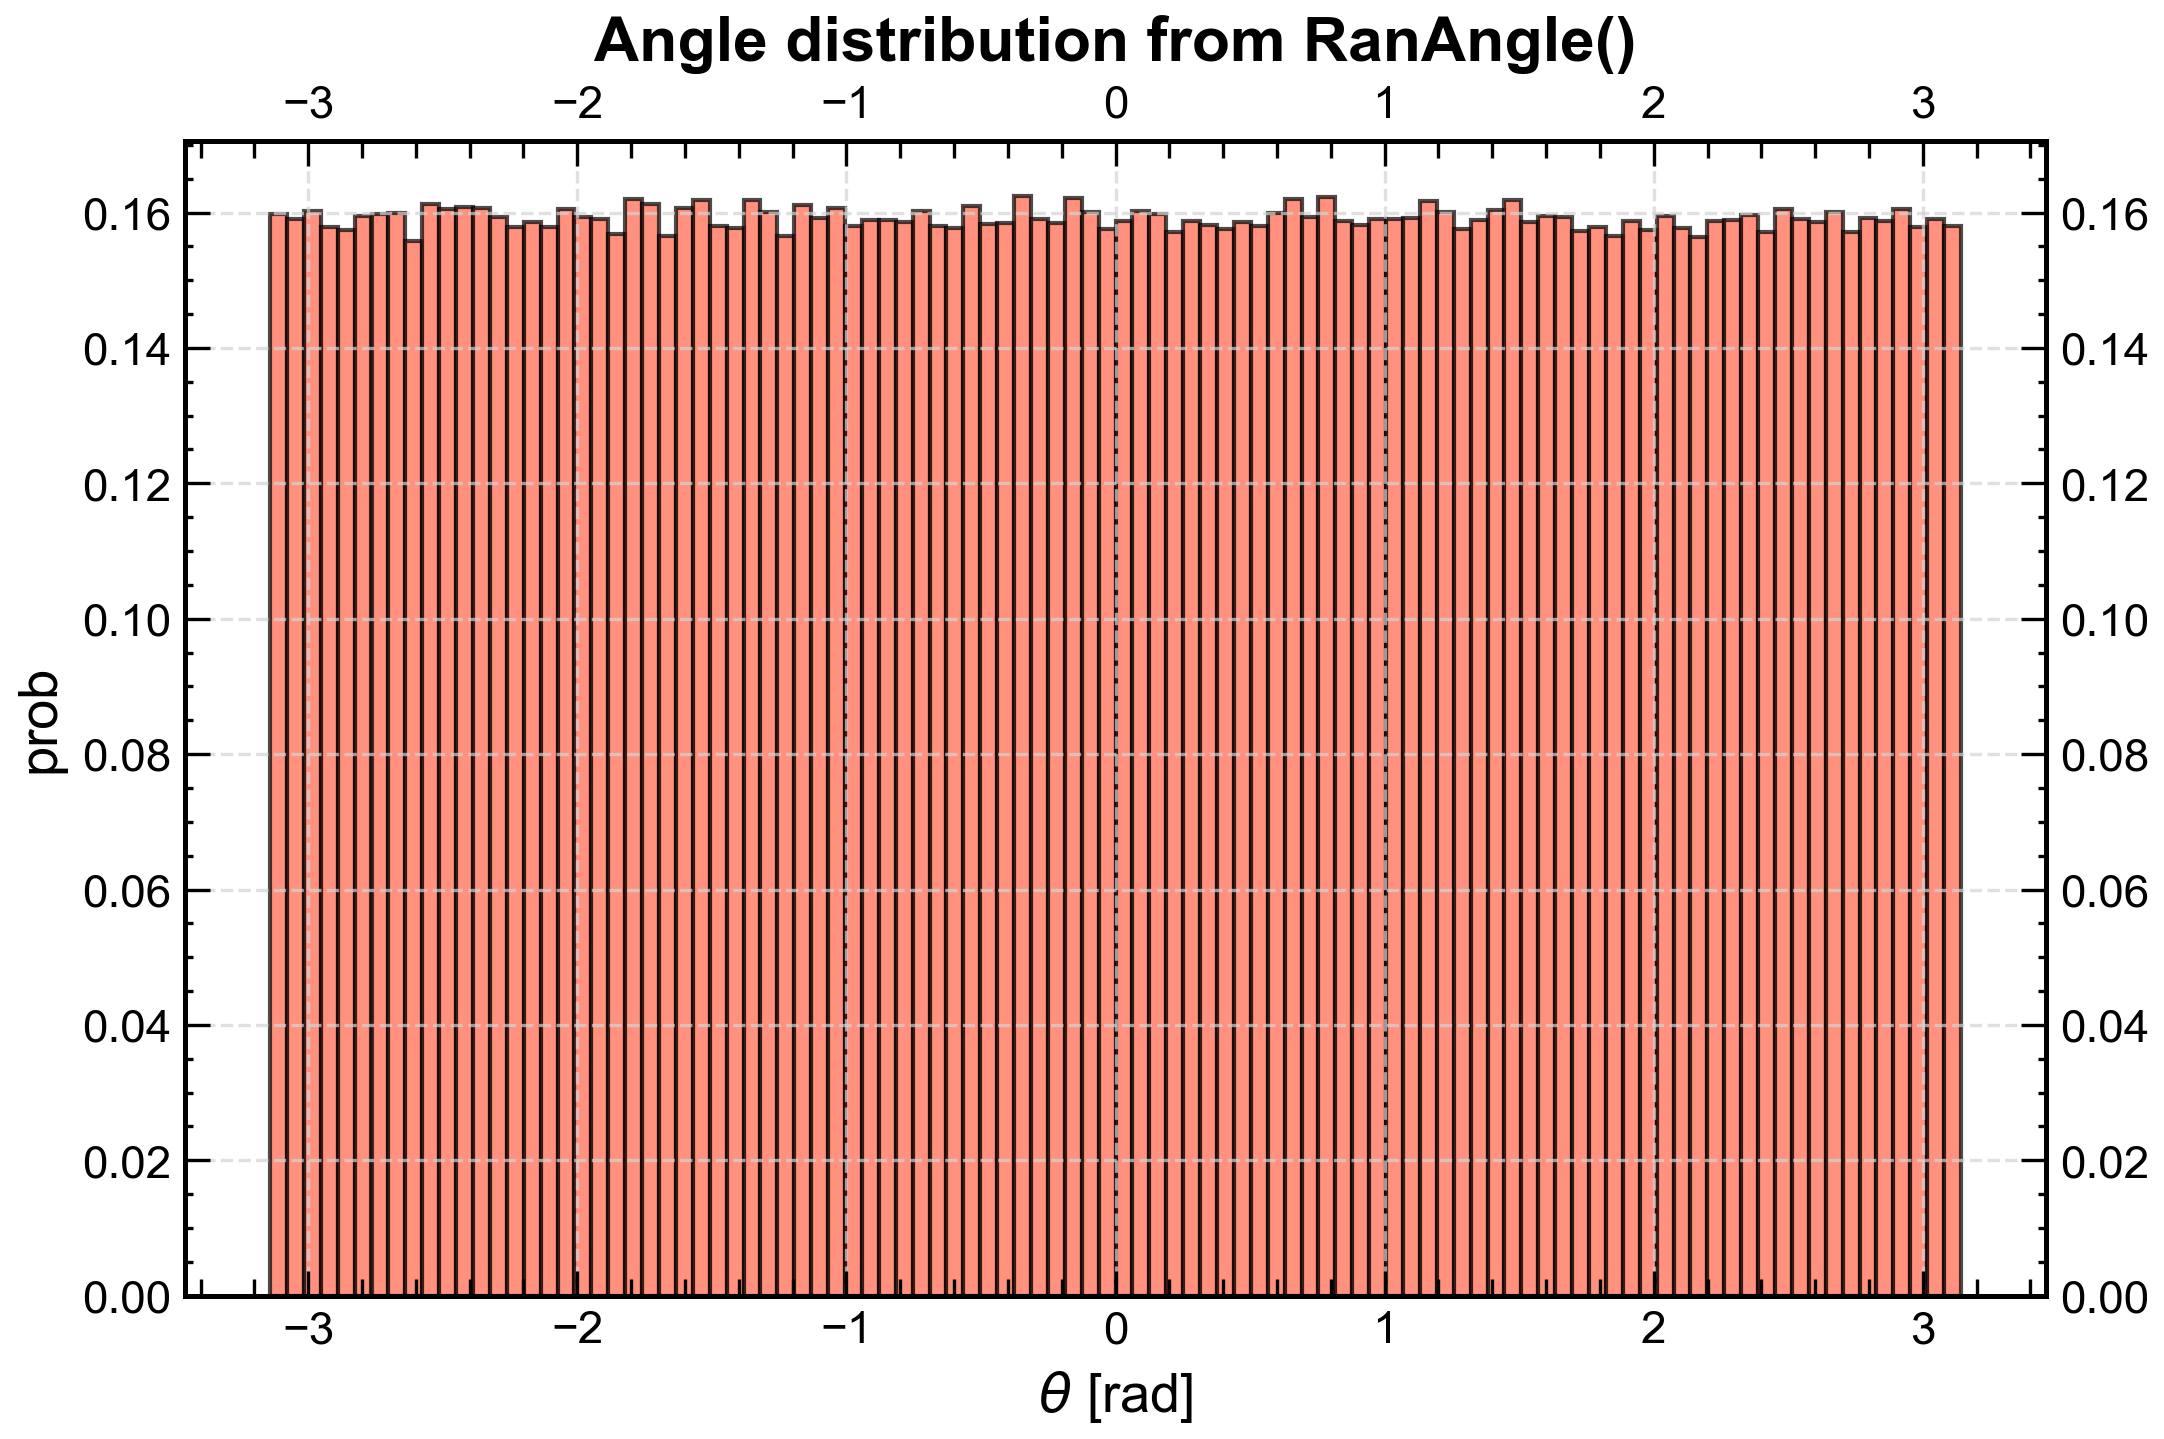

In [21]:
angle = np.loadtxt("es_1.3/OUTPUT/angle.data")
fig = plt.figure(figsize = (8,5))
plt.title("Angle distribution from RanAngle()")
plt.hist(angle, 100, range = (-math.pi, math.pi), color = "tomato", alpha = 0.7, edgecolor = "black", density = True)
plt.ylabel("prob")
plt.xlabel(r"$\theta$ [rad]")

plt.savefig("es_1.3/plots/angle_distr.png")

plt.show()

Looking up to the histogram plotted we can see (in an approximative way) that the angles sampled by the method `RanAngle()`\ coded inside _Random.cpp_ are uniformly distirbuted in $[-\pi, \pi]$ which is the same as $[0, 2\pi]$.

PI mean value at block 100 :  3.1384  ±  0.0033
distance from true value in sigma unit :  0.97


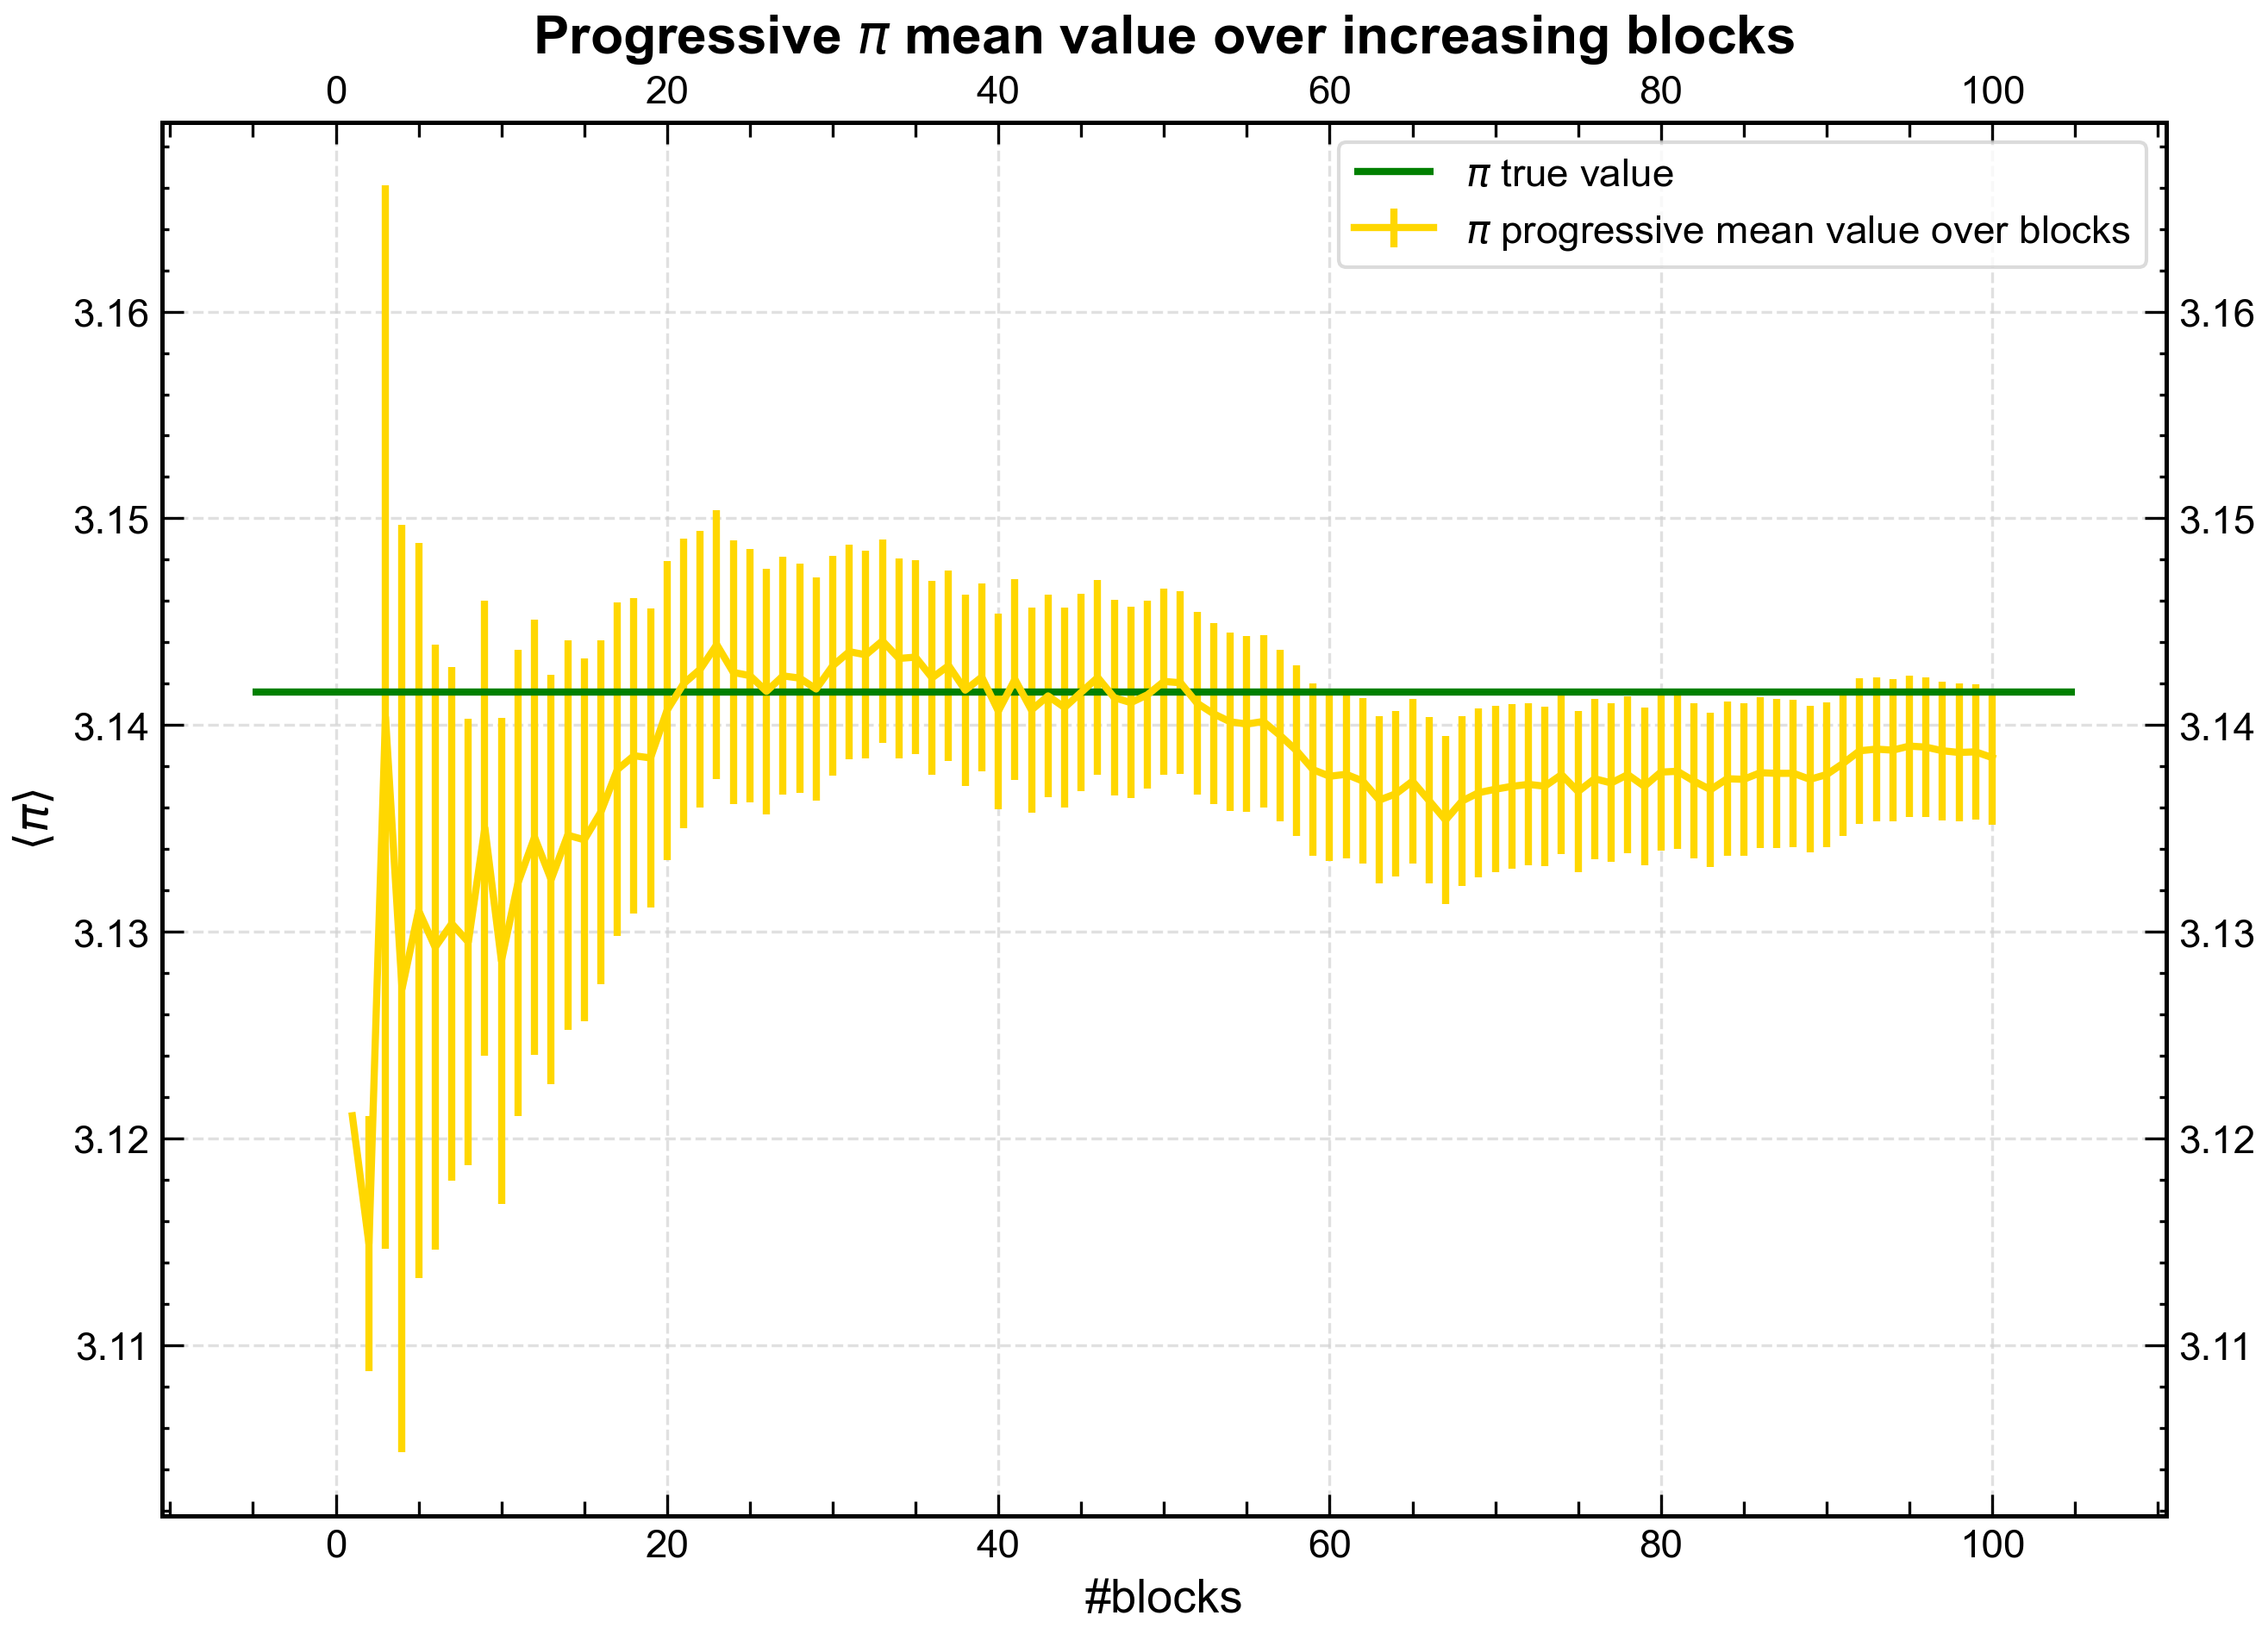

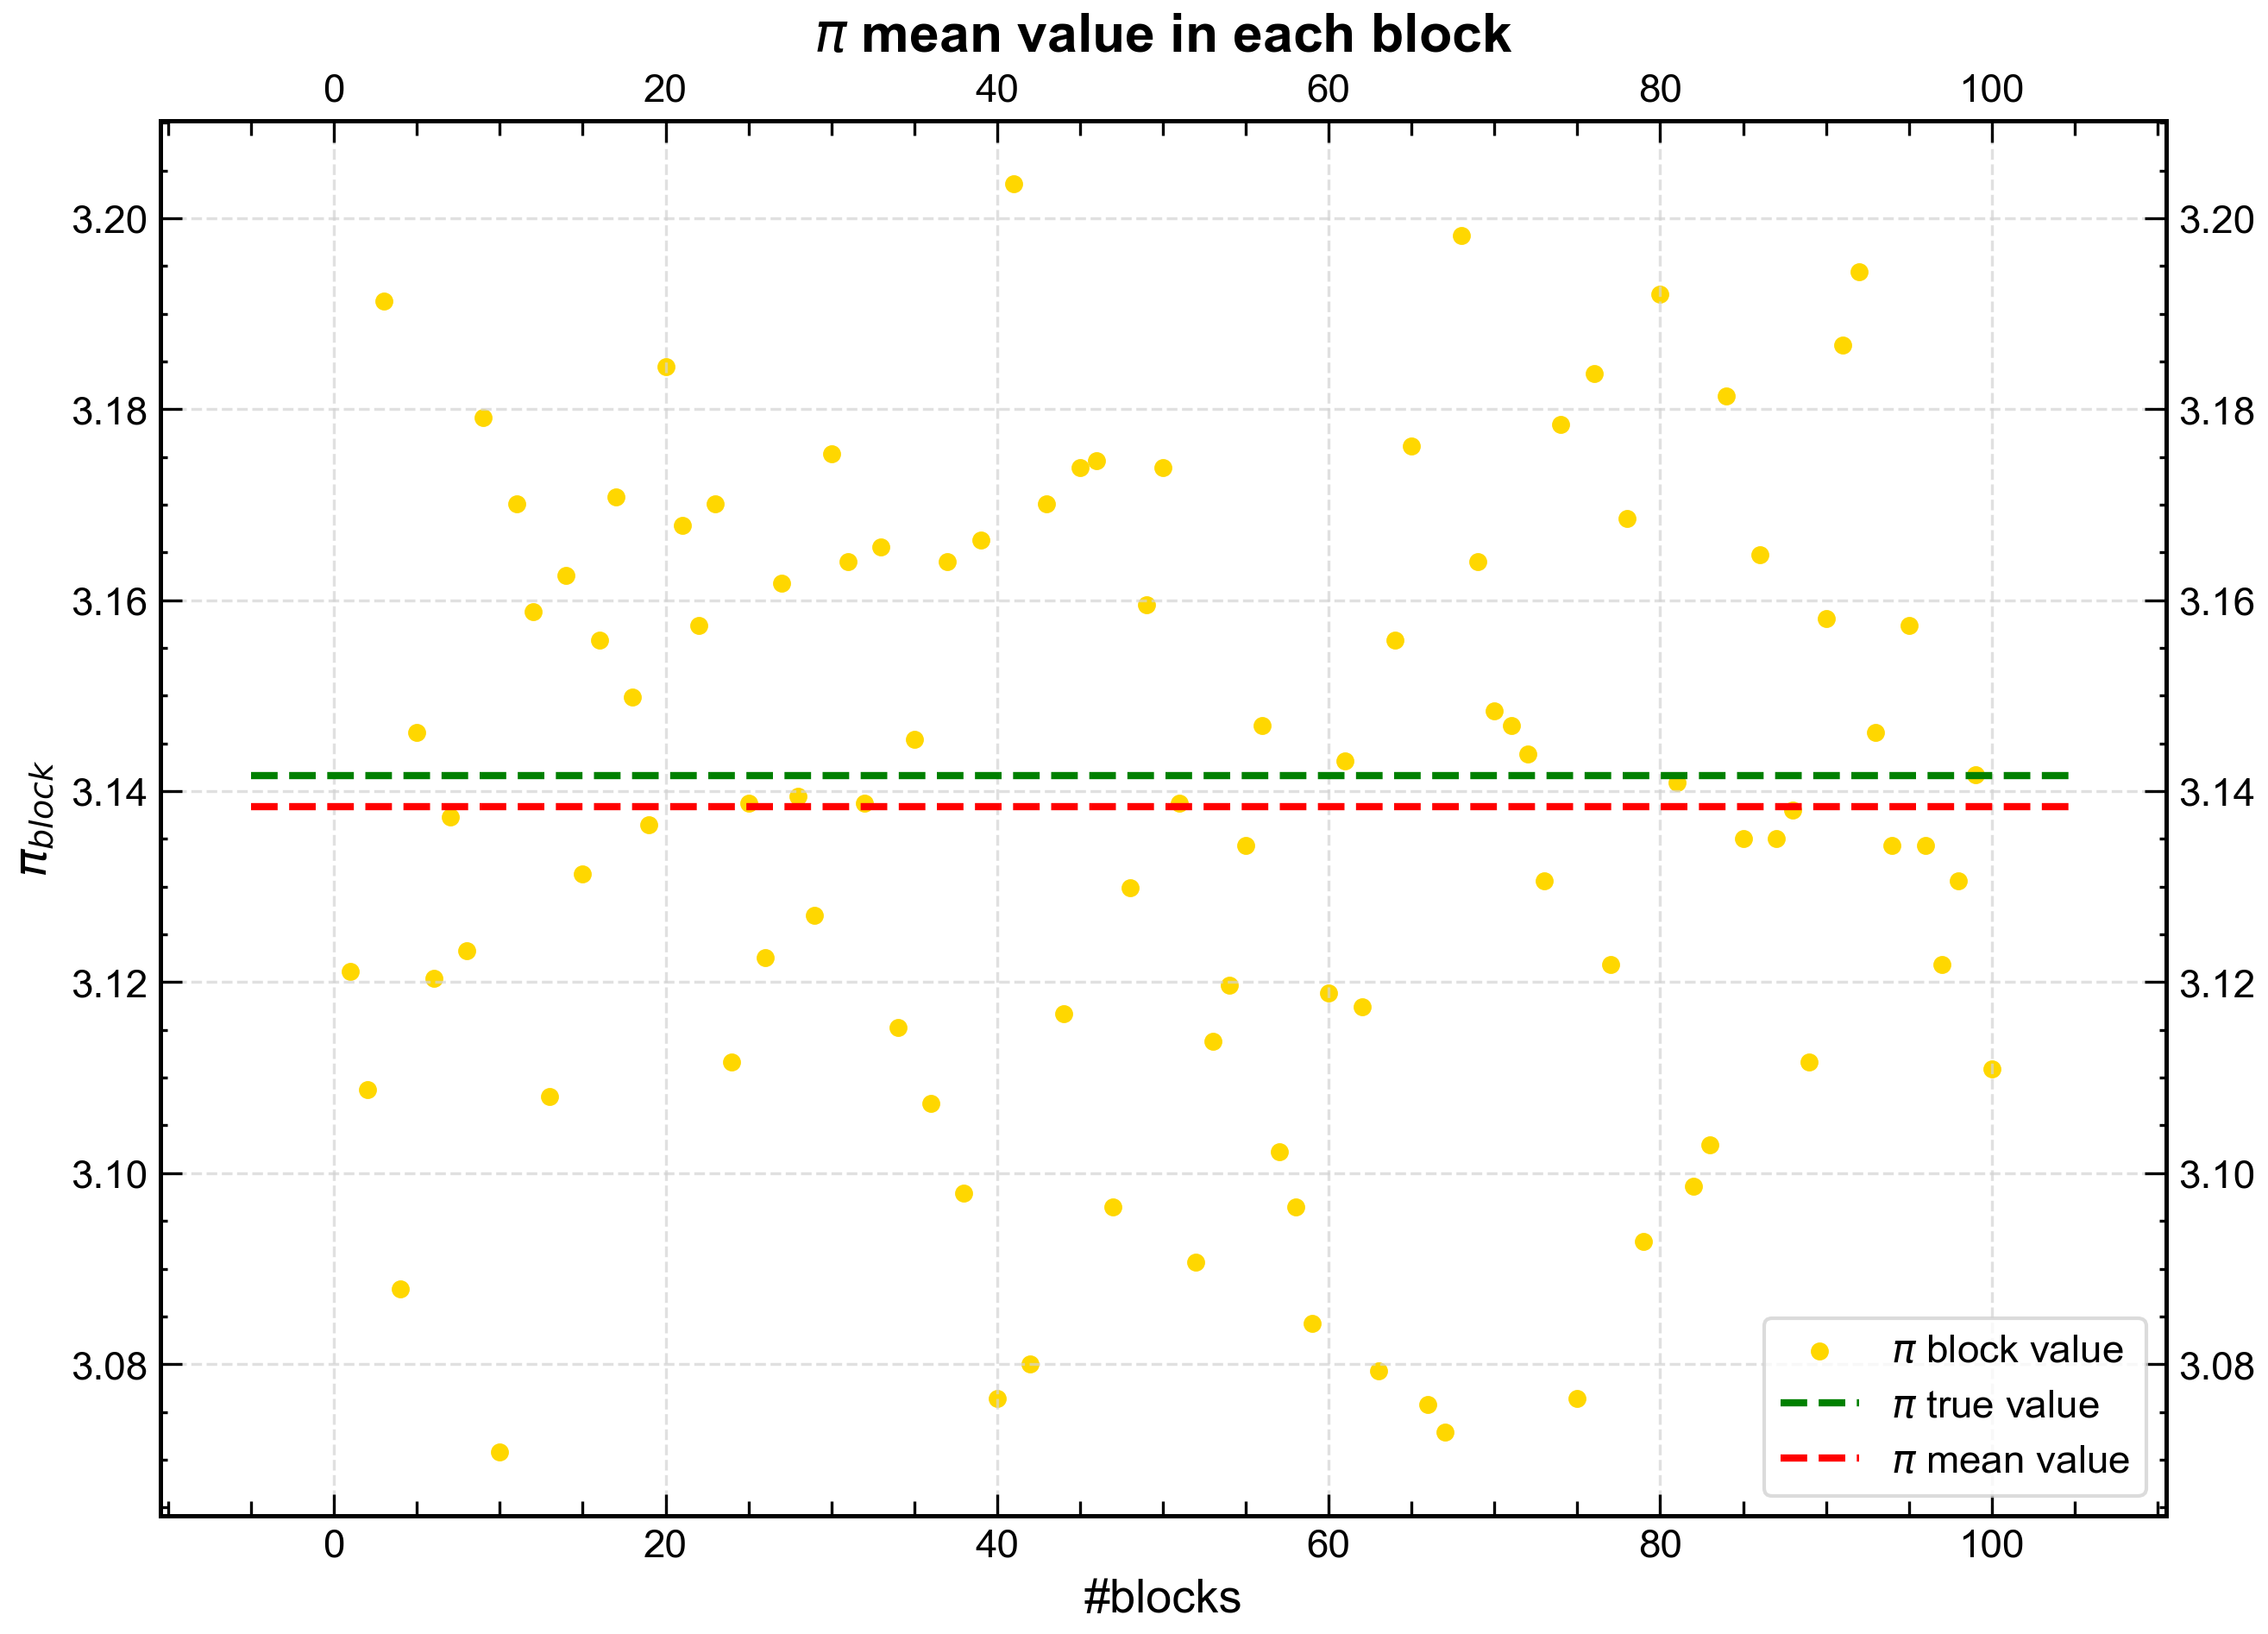

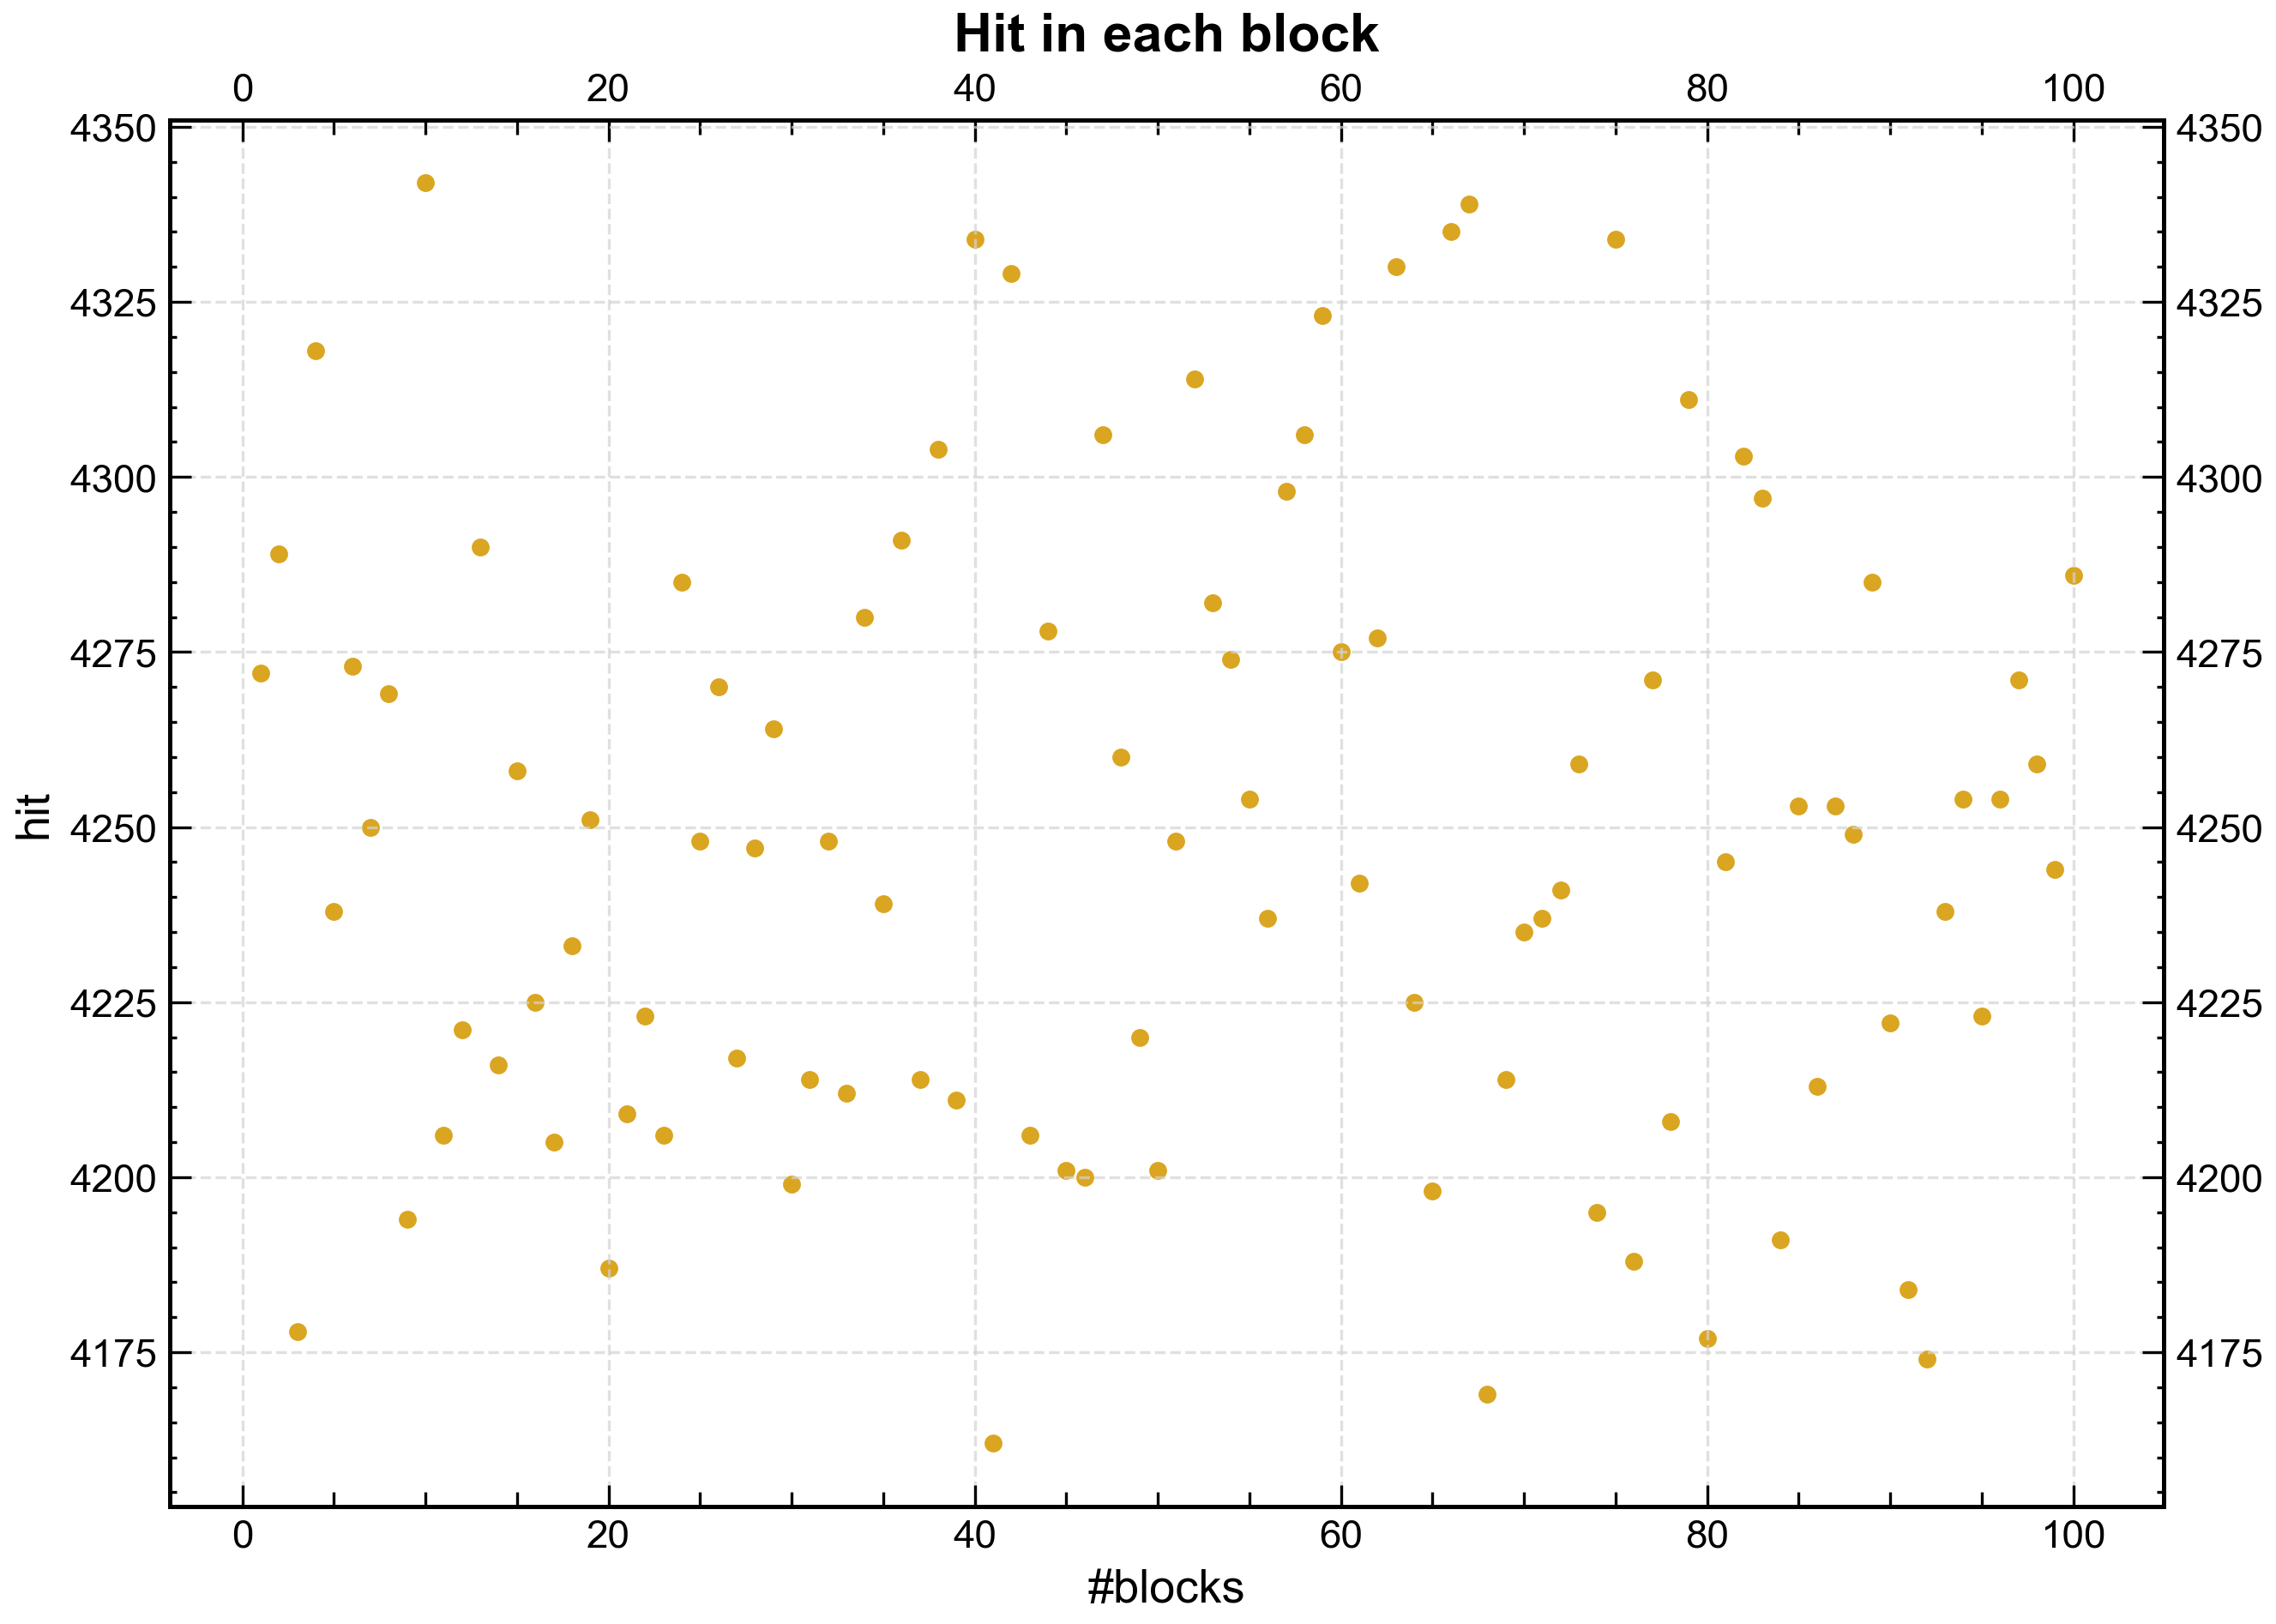

In [22]:
n_block = 100
blocks, pi_value_block, pi_value_over_blocks, error, hit = np.loadtxt("es_1.3/OUTPUT/pi.data", usecols = (0,1,2,3,4), unpack = True)


fig = plt.figure(figsize = (10,7))
plt.title(r"Progressive $\pi$ mean value over increasing blocks")
plt.errorbar(blocks + 1, pi_value_over_blocks, linewidth = 2, yerr = error, color = "gold", label = r"$\pi$ progressive mean value over blocks")
plt.hlines(math.pi, -5, n_block + 5, color = "green", linewidth = 2, label = r"$\pi$ true value")
plt.ylabel(r"$\langle \pi \rangle$")
plt.xlabel("#blocks")
# plt.grid(True)
plt.legend()

plt.savefig("es_1.3/plots/pi_prog_mean_vs_blocks.png")


fig = plt.figure(figsize = (10,7))
plt.title(r"$\pi$ mean value in each block")
plt.scatter(blocks + 1, pi_value_block, marker = "o", color = "gold", label = r"$\pi$ block value")
plt.hlines(math.pi, -5, n_block + 5, color = "green", linestyle = "--", label = r"$\pi$ true value")
plt.hlines(pi_value_over_blocks[-1], -5, n_block + 5, color = "red", linestyle = "--", label = r"$\pi$ mean value")
plt.ylabel(r"$\pi_{block}$")
plt.xlabel("#blocks")
# plt.grid(True)
plt.legend()

plt.savefig("es_1.3/plots/pi_mean_vs_block.png")


fig = plt.figure(figsize = (10,7))
plt.title("Hit in each block")
plt.scatter(blocks + 1, hit, color = "goldenrod")
plt.ylabel("hit")
plt.xlabel("#blocks")
# plt.grid(True)

plt.savefig("es_1.3/plots/hit_vs_block.png")

plt.plot()

print("PI mean value at block 100 : ", "{:.4f}".format(pi_value_over_blocks[-1]), " ± ", "{:.4f}".format(error[-1]))
print("distance from true value in sigma unit : ", "{:.2f}".format(abs(pi_value_over_blocks[-1] - math.pi)/error[-1]))

<h4>Conclusions</h4>

- First plot shows that as the blocks number increases, $\pi$ mean value converges to $\pi$ true value. <span style = "color : green"> Last progressive $\pi$ mean value after 100 blocks differ 0.97 $\sigma$ from true value, meaning that simulation results are consistent with the expected value </span>.

- Second plot shows $\pi$ mean value fluctuation over blocks. We can appreciate how different values fluctuate around the expected value.

- Third plot shows total hits number for each block. Values flutuate in a range [4150, 4350] quite close to hit mean value $\langle hit \rangle \approx 4250$.